# Modelo Semi-Estructural de PIB Potencial para España

## Estimación y Proyección del Producto Interno Bruto Potencial mediante Función de Producción y Descomposición de Factores

---

**Autor:** Manuel Alejandro Hidalgo Pérez  
**Fecha:** 24 de junio de 2025  
**Versión:** 1.0  
**Institución:** Universidad Pablo de Olavide

---

### Resumen Ejecutivo

Este notebook presenta la implementación completa de un modelo semi-estructural para la estimación del PIB potencial de España, siguiendo la metodología desarrollada originalmente para la economía chilena y adaptándola específicamente a las características de la economía española.

### Objetivos

1. **Estimar el PIB potencial** de España utilizando una función de producción Cobb-Douglas
2. **Descomponer las fuentes de crecimiento** en contribuciones de capital, trabajo y productividad
3. **Calcular la brecha de producto** como indicador de la posición cíclica de la economía
4. **Proyectar el crecimiento potencial** a medio plazo considerando tendencias demográficas y tecnológicas
5. **Validar económicamente** los resultados obtenidos mediante múltiples criterios

### Metodología

El modelo se estructura en **cinco partes principales**:

- **PARTE 1**: Carga y limpieza de datos macroeconómicos españoles
- **PARTE 2**: Estimación de la función de producción y elasticidad del capital
- **PARTE 3**: Descomposición de la Productividad Total de Factores (PTF)
- **PARTE 4**: Estimación del NAIRU y empleo potencial
- **PARTE 5**: Cálculo final del PIB potencial y proyecciones

### Fuentes de Datos

- **Contabilidad Nacional**: INE (Instituto Nacional de Estadística)
- **Datos Laborales**: EPA (Encuesta de Población Activa)
- **Datos de Capital**: Fundación BBVA-Ivie
- **Datos Internacionales**: OCDE, Eurostat, Federal Reserve

### Principales Resultados

- **Elasticidad del capital (α)**: 0.393
- **Crecimiento potencial promedio**: 1.93% anual (2002-2025)
- **Brecha de producto actual**: -8.81% (infrautilización de recursos)
- **PIB potencial actual**: 347,883 millones de euros (base 2020)
- **Proyección 2025-2027**: 2.40% anual

---

### Estructura del Notebook

```
├── PARTE 1: Carga y Limpieza de Datos
│   ├── Importación de librerías
│   ├── Carga de datos OPCE-BBVA-Ivie
│   └── Limpieza y preparación de series
│
├── PARTE 2: Estimación Función de Producción
│   ├── Método OLS directo
│   ├── Método intensivo (recomendado)
│   ├── Calibración desde literatura
│   └── Validación económica
│
├── PARTE 3: Descomposición PTF
│   ├── Cálculo residuo de Solow
│   ├── Filtro Hodrick-Prescott
│   ├── Tendencia vs. ciclo
│   └── Validación procicilidad
│
├── PARTE 4: NAIRU y Empleo Potencial
│   ├── Carga datos mercado laboral
│   ├── Estimación NAIRU
│   ├── Empleo potencial (personas)
│   └── Conversión a horas trabajadas
│
└── PARTE 5: PIB Potencial Final
    ├── Integración de componentes
    ├── Normalización y coherencia
    ├── Proyecciones 2025-2027
    ├── Gráficos y resultados
    └── Exportación para DSGE
```

---

### Notas Técnicas

- **Frecuencia**: Datos trimestrales (2002Q1 - 2025Q1)
- **Precios**: Constantes base 2020
- **Ajuste estacional**: Series desestacionalizadas
- **Software**: Python 3.9+, pandas, numpy, scipy, matplotlib

---

**⚠️ Disclaimer**: Este modelo tiene fines académicos y de investigación. Los resultados deben interpretarse considerando las limitaciones metodológicas y la incertidumbre inherente a la estimación de variables no observables como el PIB potencial.

# Modelo Semi-Estructural de PIB Potencial para España

## Marco Teórico

### Función de Producción Agregada

El modelo se fundamenta en una función de producción Cobb-Douglas estándar:

$$Y_t = A_t \cdot K_t^{\alpha} \cdot L_t^{1-\alpha}$$

donde:
- $Y_t$: PIB real en el período $t$ (millones de euros constantes)
- $A_t$: Productividad Total de los Factores (PTF)
- $K_t$: Stock de capital productivo (millones de euros constantes)
- $L_t$: Factor trabajo medido en horas trabajadas (millones de horas)
- $\alpha$: Elasticidad del producto respecto al capital

### PIB Potencial

El PIB potencial se define como el nivel de producción sostenible de largo plazo:

$$\bar{Y}_t = \bar{A}_t \cdot K_t^{\alpha} \cdot \bar{L}_t^{1-\alpha}$$

donde:
- $\bar{A}_t$: Componente tendencial de la PTF (libre de fluctuaciones cíclicas)
- $\bar{L}_t$: Empleo potencial compatible con la tasa natural de desempleo (NAIRU)

### Brecha de Producto

La brecha de producto mide la desviación del PIB real respecto a su nivel potencial:

$$\text{gap}_t = \frac{Y_t - \bar{Y}_t}{\bar{Y}_t} \times 100$$

Una brecha positiva indica sobrecalentamiento económico, mientras que una negativa sugiere recursos infrautilizados.

---

## PARTE 1: Carga y Limpieza de Datos

### Fuentes de Datos

El modelo utiliza datos trimestrales del sistema de cuentas nacionales español:

- **PIB Real**: Serie de PIB a precios constantes (base 2020)
- **Stock de Capital**: Datos de formación bruta de capital fijo acumulada
- **Horas Trabajadas**: Total de horas efectivamente trabajadas en la economía
- **Datos Laborales**: Tasa de desempleo, población activa, empleo

### Tratamiento de Datos

#### Conversión de Frecuencias

Para series con frecuencias mixtas, se aplica interpolación cúbica:

$$x_t^{(q)} = \text{CubicSpline}(x_t^{(a)})$$

donde $x_t^{(q)}$ denota la serie trimestral y $x_t^{(a)}$ la serie anual.

#### Ajuste Estacional

Las series se procesan utilizando el procedimiento X-13ARIMA-SEATS para eliminar efectos estacionales y de calendario.

---

🇪🇸 PIB POTENCIAL ESPAÑA - PARTE 1
   Fuente: OPCE-BBVA-Ivie
📊 PARTE 1: Cargando datos OPCE...
   ✅ Archivo leído: 3030 filas, 24 columnas

🔍 Primeras 3 filas:
  YEAR_TRIM  YEAR  TRIM                                      Sector_desc  \
0    2000TI  2000    TI  1. Agricultura, ganadería, silvicultura y pesca   
1   2000TII  2000   TII  1. Agricultura, ganadería, silvicultura y pesca   
2  2000TIII  2000  TIII  1. Agricultura, ganadería, silvicultura y pesca   

  SECTOR_CODE                                        Tipo_dato  VABnominal  \
0           A  Ajustado por estacionalidad y efecto calendario        6099   
1           A  Ajustado por estacionalidad y efecto calendario        5799   
2           A  Ajustado por estacionalidad y efecto calendario        6115   

       VABreal  VABreal_IVE  VAB_deflactor  ...   HEMP_TV    EMP_TV  \
0  6904.252870      87.8264      88.336857  ... -0.379882  0.886669   
1  7063.639714      89.8539      82.096486  ... -3.078048  3.074980   
2  7034.96

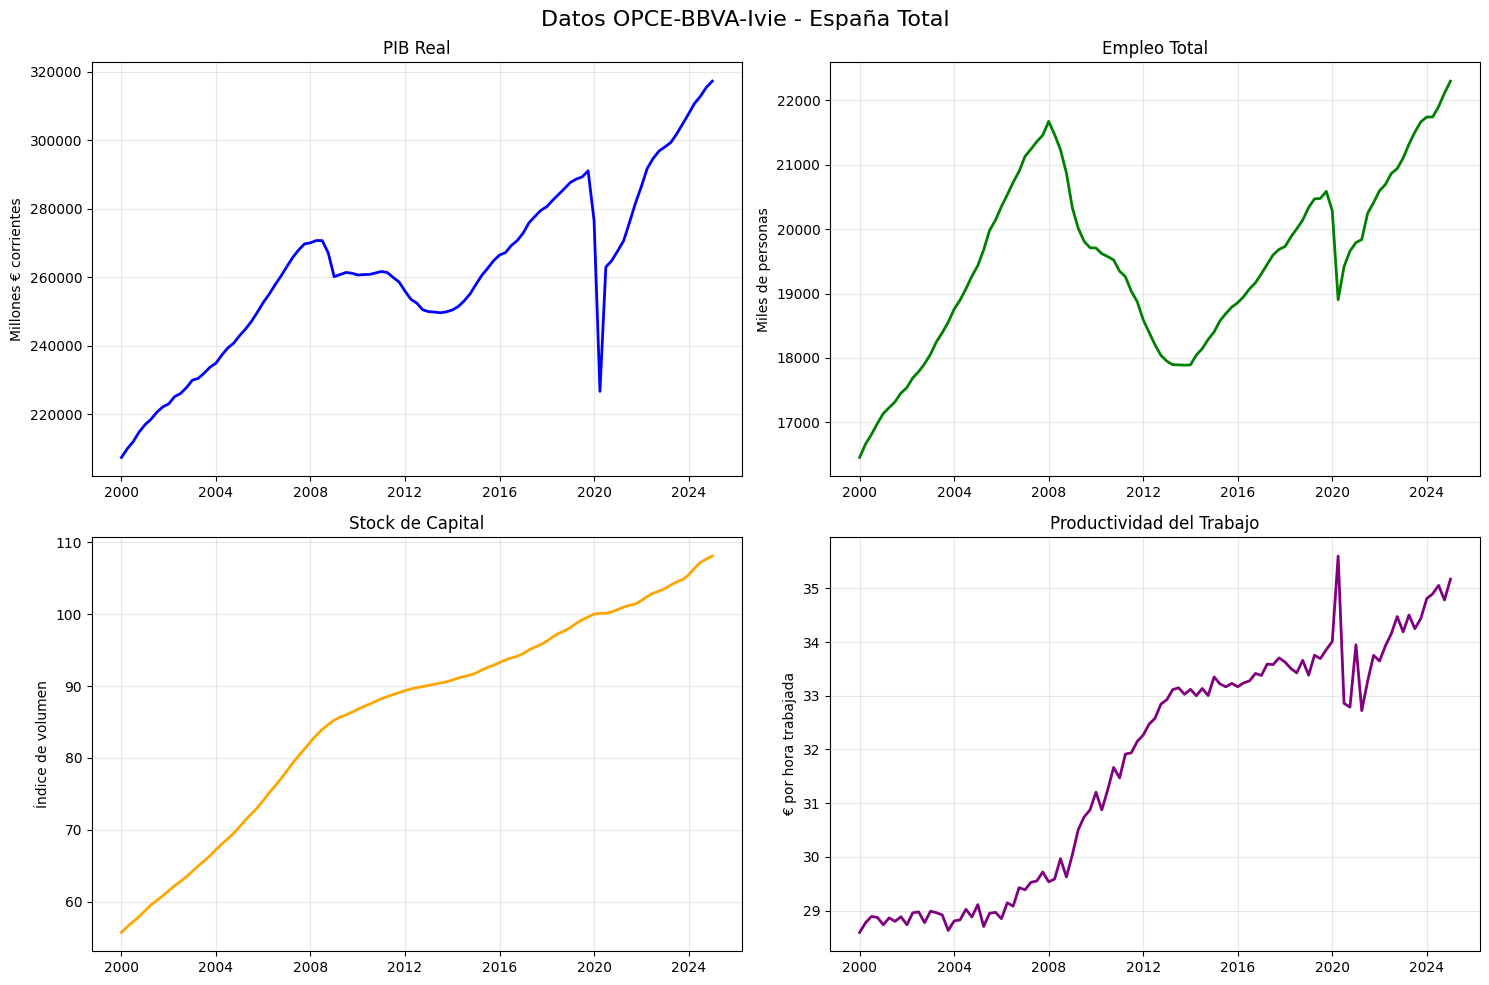


✅ PARTE 1 COMPLETADA
   Dataset listo para estimación función de producción


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_opce_data():
    """
    PARTE 1: Cargar y limpiar datos OPCE-BBVA-Ivie
    """
    
    # Ruta del archivo
    file_path = r"C:\Users\Usuario\Documents\Github\DGSE\datos\OPCE_Rastreador_T1_2025_BD.xlsx"
    
    print("📊 PARTE 1: Cargando datos OPCE...")
    
    try:
        # Leer Excel
        df = pd.read_excel(file_path, sheet_name='BD_Rastreador')
        print(f"   ✅ Archivo leído: {len(df)} filas, {len(df.columns)} columnas")
        
        # Mostrar primeras filas para verificar
        print("\n🔍 Primeras 3 filas:")
        print(df.head(3))
        
        # Mostrar valores únicos de SECTOR_CODE
        print(f"\n📋 Valores en SECTOR_CODE:")
        print(df['SECTOR_CODE'].unique())
        
        # Filtrar solo total economía
        df_total = df[df['SECTOR_CODE'] == 'TOT'].copy()
        df_total = df_total[df_total["Tipo_dato"] == 'Ajustado por estacionalidad y efecto calendario'].copy()
        print(f"\n✅ Datos filtrados (SECTOR_CODE='TOT'): {len(df_total)} observaciones")
        
        if len(df_total) == 0:
            print("❌ ERROR: No se encontraron datos con SECTOR_CODE='TOT'")
            return None
            
        # Crear índice temporal (formato específico OPCE: 2000TI, 2000TII, etc.)
        if 'YEAR_TRIM' in df_total.columns:
            def convert_opce_date(year_trim_str):
                """Convertir formato OPCE (2000TI) a fecha pandas"""
                year_str = year_trim_str[:4]  # Primeros 4 caracteres = año
                trim_str = year_trim_str[4:]  # Resto = trimestre
                
                # Mapeo trimestres OPCE a números
                trim_mapping = {'TI': 1, 'TII': 2, 'TIII': 3, 'TIV': 4}
                quarter_num = trim_mapping.get(trim_str, 1)
                
                # Crear fecha como primer día del trimestre
                return pd.to_datetime(f"{year_str}-{quarter_num*3-2:02d}-01")
            
            df_total['date'] = df_total['YEAR_TRIM'].apply(convert_opce_date)
            print(f"   ✅ Fechas convertidas de formato OPCE")
            
        elif 'YEAR' in df_total.columns and 'TRIM' in df_total.columns:
            # Si están separados
            def convert_separate_date(row):
                year = int(row['YEAR'])
                trim_str = row['TRIM']
                trim_mapping = {'TI': 1, 'TII': 2, 'TIII': 3, 'TIV': 4}
                quarter_num = trim_mapping.get(trim_str, 1)
                return pd.to_datetime(f"{year}-{quarter_num*3-2:02d}-01")
            
            df_total['date'] = df_total.apply(convert_separate_date, axis=1)
            print(f"   ✅ Fechas convertidas de columnas separadas")
        else:
            print("❌ ERROR: No se encuentra columna de tiempo")
            return None
            
        # Ordenar por fecha y establecer como índice
        df_total = df_total.sort_values('date').set_index('date')
        
        # Verificar columnas disponibles
        print(f"\n📋 Columnas disponibles:")
        available_vars = [
            'VABnominal', 'VABreal', 'VABreal_IVE', 'VAB_deflactor', 
            'HEMP', 'EMP', 'KqGFCF_IV', 'VABreal_TV', 'HEMP_TV', 
            'EMP_TV', 'KqGFCF_TV', 'VAConH', 'VAConKGFCF', 'VAConPTF',
            'Y_L', 'Y_L_TV', 'Y_K', 'Y_K_TV'
        ]
        
        for var in available_vars:
            if var in df_total.columns:
                n_obs = df_total[var].notna().sum()
                print(f"   ✅ {var}: {n_obs} observaciones válidas")
            else:
                print(f"   ❌ {var}: NO ENCONTRADA")
        
        # Mostrar rango temporal
        print(f"\n📅 Período: {df_total.index[0].strftime('%Y-%m')} a {df_total.index[-1].strftime('%Y-%m')}")
        print(f"   Total trimestres: {len(df_total)}")
        
        return df_total
        
    except Exception as e:
        print(f"❌ ERROR al cargar archivo: {e}")
        return None

def clean_and_prepare_data(df_raw):
    """
    Limpiar y preparar datos para estimación
    """
    
    print("\n🧹 Limpiando y preparando datos...")
    
    if df_raw is None:
        return None
    
    # Crear diccionario de datos limpios
    data_clean = {}
    
    # Variables principales (renombrar para claridad)
    variable_mapping = {
        'VABreal': 'gdp_real',              # PIB real (millones €)
        'EMP': 'employment',                # Empleo (miles personas)
        'HEMP': 'hours_worked',             # Horas trabajadas (miles)
        'KqGFCF_IV': 'capital_stock',       # Stock capital (índice)
        'VAConPTF': 'tfp_contribution',     # Contribución TFP (pp)
        'Y_L': 'labor_productivity',        # Productividad trabajo
        'Y_K': 'capital_productivity',      # Productividad capital
        'VABreal_TV': 'gdp_growth',         # Crecimiento PIB
        'EMP_TV': 'employment_growth',      # Crecimiento empleo
        'HEMP_TV': 'hours_growth'           # Crecimiento horas
    }
    
    # Limpiar cada variable
    for opce_var, clean_var in variable_mapping.items():
        if opce_var in df_raw.columns:
            # Limpiar datos (quitar outliers extremos, interpolate gaps pequeños)
            series = df_raw[opce_var].copy()
            
            # Reemplazar valores extremos (más de 5 desviaciones estándar)
            mean_val = series.mean()
            std_val = series.std()
            outlier_mask = np.abs(series - mean_val) > 5 * std_val
            series[outlier_mask] = np.nan
            
            # Interpolar gaps pequeños (máximo 2 trimestres)
            series = series.interpolate(method='linear', limit=2)
            
            # Forward fill al final de la serie
            series = series.fillna(method='ffill')
            
            data_clean[clean_var] = series.values
            
            print(f"   ✅ {clean_var}: {series.notna().sum()}/{len(series)} obs válidas")
        else:
            print(f"   ⚠️ {opce_var} no encontrada")
    
    # Crear DataFrame final
    data_df = pd.DataFrame(data_clean, index=df_raw.index)
    
    # Verificar consistencia temporal
    print(f"\n📊 Dataset final:")
    print(f"   • Período: {data_df.index[0].strftime('%Y-%m')} - {data_df.index[-1].strftime('%Y-%m')}")
    print(f"   • Observaciones: {len(data_df)}")
    print(f"   • Variables: {len(data_df.columns)}")
    
    # Mostrar estadísticas básicas
    print(f"\n📈 Estadísticas básicas (últimos 5 años):")
    recent_data = data_df.iloc[-20:] if len(data_df) > 20 else data_df
    
    if 'gdp_real' in recent_data.columns:
        gdp_growth_recent = recent_data['gdp_real'].pct_change().mean() * 400  # Anualizado
        print(f"   • Crecimiento PIB promedio: {gdp_growth_recent:.2f}% anual")
    
    if 'employment' in recent_data.columns:
        emp_level_recent = recent_data['employment'].iloc[-1]
        print(f"   • Empleo actual: {emp_level_recent:.0f} miles personas")
        
    if 'tfp_contribution' in recent_data.columns:
        tfp_contrib_recent = recent_data['tfp_contribution'].mean()
        print(f"   • Contribución TFP promedio: {tfp_contrib_recent:.2f} pp")
    
    return data_df

def plot_raw_data(data_df):
    """
    Gráficos exploratorios de los datos cargados
    """
    
    if data_df is None or len(data_df) == 0:
        print("❌ No hay datos para graficar")
        return
    
    print("\n📊 Generando gráficos exploratorios...")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Datos OPCE-BBVA-Ivie - España Total', fontsize=16)
    
    # 1. PIB Real
    if 'gdp_real' in data_df.columns:
        ax1 = axes[0, 0]
        ax1.plot(data_df.index, data_df['gdp_real'], linewidth=2, color='blue')
        ax1.set_title('PIB Real')
        ax1.set_ylabel('Millones € corrientes')
        ax1.grid(True, alpha=0.3)
        
        # Marcar crisis principales
        crisis_dates = ['2008Q3', '2020Q1']
        for crisis in crisis_dates:
            if crisis in data_df.index.strftime('%YQ%q'):
                ax1.axvline(pd.to_datetime(crisis, format='%YQ%q'), 
                           color='red', linestyle='--', alpha=0.7)
    
    # 2. Empleo
    if 'employment' in data_df.columns:
        ax2 = axes[0, 1]
        ax2.plot(data_df.index, data_df['employment'], linewidth=2, color='green')
        ax2.set_title('Empleo Total')
        ax2.set_ylabel('Miles de personas')
        ax2.grid(True, alpha=0.3)
    
    # 3. Stock de Capital
    if 'capital_stock' in data_df.columns:
        ax3 = axes[1, 0]
        ax3.plot(data_df.index, data_df['capital_stock'], linewidth=2, color='orange')
        ax3.set_title('Stock de Capital')
        ax3.set_ylabel('Índice de volumen')
        ax3.grid(True, alpha=0.3)
    
    # 4. Productividad del Trabajo
    if 'labor_productivity' in data_df.columns:
        ax4 = axes[1, 1]
        ax4.plot(data_df.index, data_df['labor_productivity'], linewidth=2, color='purple')
        ax4.set_title('Productividad del Trabajo')
        ax4.set_ylabel('€ por hora trabajada')
        ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# EJECUTAR PARTE 1
if __name__ == "__main__":
    
    print("="*60)
    print("🇪🇸 PIB POTENCIAL ESPAÑA - PARTE 1")
    print("   Fuente: OPCE-BBVA-Ivie")
    print("="*60)
    
    # Cargar datos
    df_raw = load_opce_data()
    
    if df_raw is not None:
        # Limpiar datos
        data_clean = clean_and_prepare_data(df_raw)
        
        if data_clean is not None:
            # Gráficos exploratorios
            plot_raw_data(data_clean)
            
            print(f"\n✅ PARTE 1 COMPLETADA")
            print(f"   Dataset listo para estimación función de producción")
        else:
            print(f"\n❌ ERROR en limpieza de datos")
    else:
        print(f"\n❌ ERROR en carga de datos")

## PARTE 2: Estimación de la Función de Producción

### Metodologías de Estimación

#### Método OLS Directo

Estimación por mínimos cuadrados ordinarios en forma logarítmica:

$$\ln(Y_t) = \beta_0 + \alpha \ln(K_t) + (1-\alpha) \ln(L_t) + \varepsilon_t$$

#### Método Intensivo (Recomendado)

Para mitigar problemas de cointegración espuria, se estima:

$$\ln\left(\frac{Y_t}{L_t}\right) = \beta_0 + \alpha \ln\left(\frac{K_t}{L_t}\right) + \varepsilon_t$$

Este método es más robusto al expresar la relación en términos de productividad e intensidad de capital.

#### Calibración Literatura

Como referencia se utiliza $\alpha = 0.35$, valor consensuado en la literatura para España.

### Validación Económica

#### Criterios de Validación

1. **Rango plausible**: $0.25 \leq \alpha \leq 0.45$
2. **Procicilidad PTF**: $\text{corr}(\Delta \ln A_t, \Delta \ln Y_t) > 0.3$
3. **Coherencia productividad**: $\text{corr}(\text{Prod}_{obs}, \text{Prod}_{impl}) > 0.95$

---


🏭 PARTE 2: ESTIMACIÓN FUNCIÓN DE PRODUCCIÓN
   📋 Usando HORAS TRABAJADAS (input más preciso)
📊 Variables para estimación:
   • Y (PIB real): 101 observaciones
   • L (Horas trabajadas): 101 observaciones
   • K (Capital): 101 observaciones

🔧 Preparando datos para estimación...
   • Observaciones válidas: 101

📈 MÉTODO 1: Regresión OLS directa

📈 MÉTODO 2: Regresión intensiva (recomendado)

📈 MÉTODO 3: Calibración literatura España
   📚 Valor Banco de España: α = 0.35
   📚 Rango literatura: α ∈ [0.30, 0.40]

📊 COMPARACIÓN DE MÉTODOS:
   • Método directo - α: 0.393, R²: 0.964
   • Método intensivo - α: 0.393, R²: 0.928
   • Calibración - α: 0.350

✅ MÉTODO SELECCIONADO: Intensivo (OLS)

🔧 Calculando TFP con α = 0.393...
   • TFP inicial (2000): 100.0
   • TFP final (2025): 103.3
   • Crecimiento TFP promedio: 0.14% anual

📊 Generando gráficos de validación...


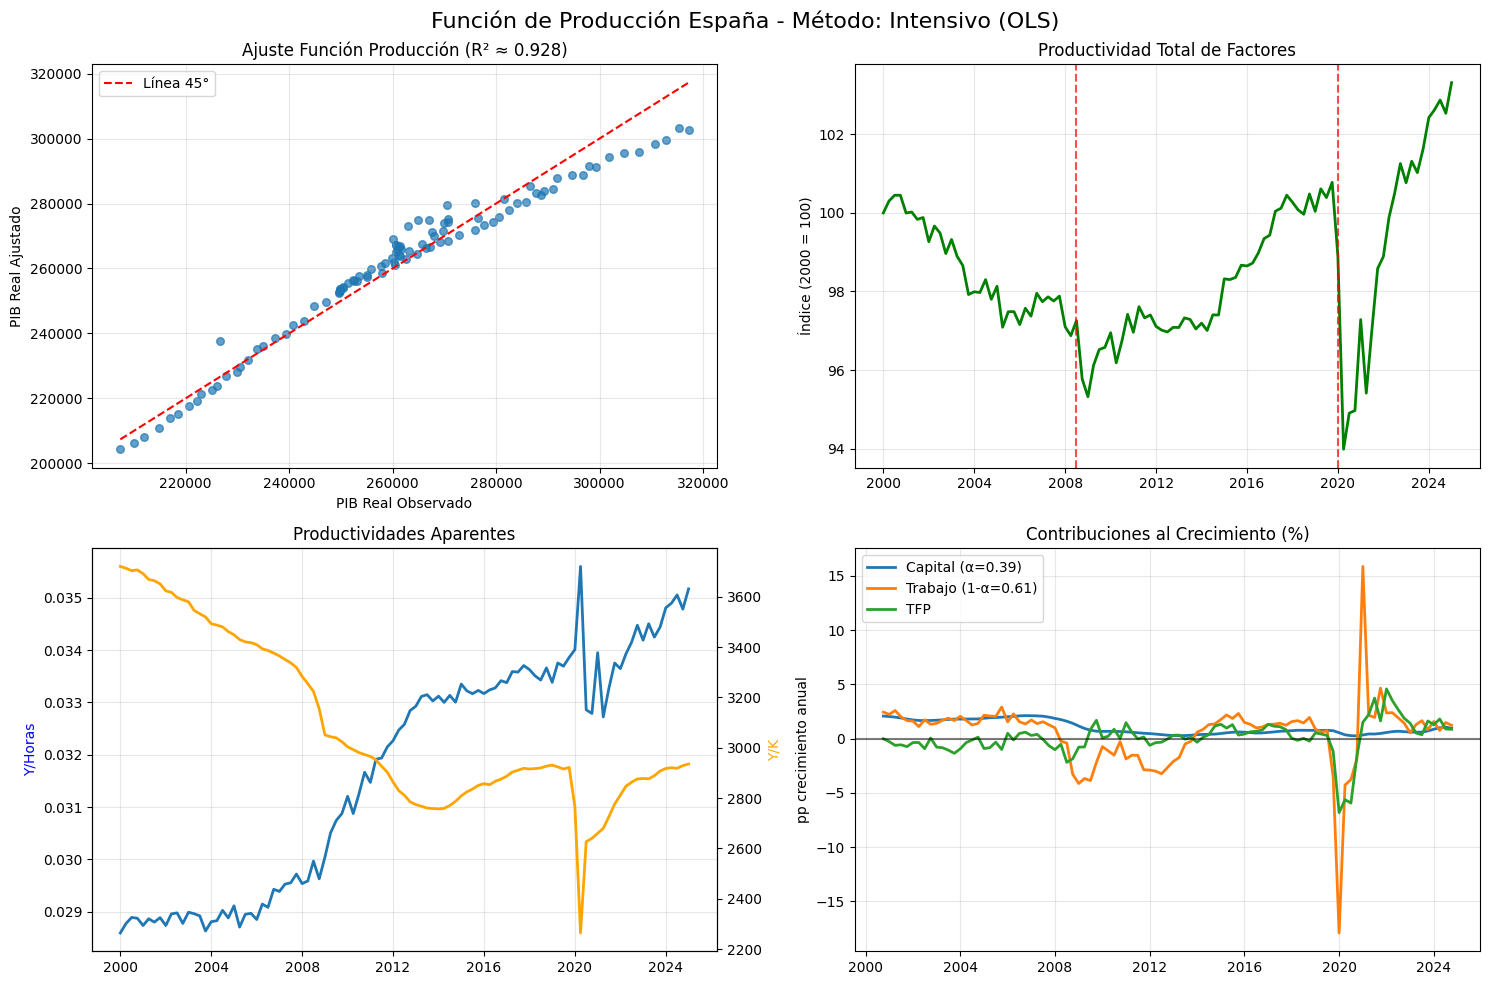


📈 ESTADÍSTICAS DE VALIDACIÓN:
   • Elasticidad capital (α): 0.393
   • Elasticidad trabajo (1-α): 0.607
   • Rendimientos a escala: 1.000
   • R² función producción: 0.928
   • Crecimiento TFP promedio: 0.14% anual

🔍 VALIDACIONES ECONÓMICAS:
   ✅ Elasticidad capital en rango normal: 0.393
   ✅ Crecimiento TFP plausible: 0.14% anual
   ✅ TFP procíclica: correlación = 0.645


In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def estimate_production_function(data_df):
    """
    PARTE 2: Estimar función de producción Cobb-Douglas
    Y = A × K^α × L^(1-α)
    
    Usando HORAS TRABAJADAS (mejor que empleo) de datos OPCE
    """
    
    print("\n" + "="*60)
    print("🏭 PARTE 2: ESTIMACIÓN FUNCIÓN DE PRODUCCIÓN")
    print("   📋 Usando HORAS TRABAJADAS (input más preciso)")
    print("="*60)
    
    # Verificar datos disponibles - USAR HORAS en lugar de empleo
    required_vars = ['gdp_real', 'hours_worked', 'capital_stock']
    missing_vars = [var for var in required_vars if var not in data_df.columns]
    
    if missing_vars:
        print(f"❌ Variables faltantes: {missing_vars}")
        return None
    
    print("📊 Variables para estimación:")
    print(f"   • Y (PIB real): {data_df['gdp_real'].notna().sum()} observaciones")
    print(f"   • L (Horas trabajadas): {data_df['hours_worked'].notna().sum()} observaciones") 
    print(f"   • K (Capital): {data_df['capital_stock'].notna().sum()} observaciones")
    
    # Preparar datos en logaritmos
    print(f"\n🔧 Preparando datos para estimación...")
    
    # Limpiar datos (quitar NaN y valores <= 0)
    clean_data = data_df[['gdp_real', 'hours_worked', 'capital_stock']].copy()
    clean_data = clean_data.dropna()
    clean_data = clean_data[(clean_data > 0).all(axis=1)]
    
    print(f"   • Observaciones válidas: {len(clean_data)}")
    
    if len(clean_data) < 20:
        print("❌ Datos insuficientes para estimación")
        return None
    
    # Logaritmos
    log_Y = np.log(clean_data['gdp_real'])
    log_L = np.log(clean_data['hours_worked'])  # CAMBIO: usar horas
    log_K = np.log(clean_data['capital_stock'])
    
    # MÉTODO 1: Regresión directa log(Y) = const + α*log(K) + β*log(L)
    print(f"\n📈 MÉTODO 1: Regresión OLS directa")
    results_direct = estimate_direct_ols(log_Y, log_K, log_L)
    
    # MÉTODO 2: Regresión intensiva log(Y/L) = const + α*log(K/L) 
    print(f"\n📈 MÉTODO 2: Regresión intensiva (recomendado)")
    results_intensive = estimate_intensive_ols(log_Y, log_K, log_L)
    
    # MÉTODO 3: Calibración basada en literatura
    print(f"\n📈 MÉTODO 3: Calibración literatura España")
    results_calibrated = calibrate_alpha_spain()
    
    # Comparar métodos
    print(f"\n📊 COMPARACIÓN DE MÉTODOS:")
    print(f"   • Método directo - α: {results_direct['alpha']:.3f}, R²: {results_direct['r_squared']:.3f}")
    print(f"   • Método intensivo - α: {results_intensive['alpha']:.3f}, R²: {results_intensive['r_squared']:.3f}")
    print(f"   • Calibración - α: {results_calibrated['alpha']:.3f}")
    
    # Seleccionar mejor método (intensivo si R² > 0.8, sino calibración)
    if results_intensive['r_squared'] > 0.80:
        best_method = results_intensive
        method_name = "Intensivo (OLS)"
        print(f"\n✅ MÉTODO SELECCIONADO: {method_name}")
    else:
        best_method = results_calibrated
        method_name = "Calibración"
        print(f"\n✅ MÉTODO SELECCIONADO: {method_name}")
        print(f"   (R² intensivo muy bajo: {results_intensive['r_squared']:.3f})")
    
    # Calcular TFP implícita con parámetros seleccionados
    tfp_results = calculate_implied_tfp(clean_data, best_method['alpha'])
    
    # Combinar resultados
    final_results = {
        **best_method,
        'method_used': method_name,
        'tfp_series': tfp_results['tfp_series'],
        'tfp_index': tfp_results['tfp_index'],
        'tfp_growth': tfp_results['tfp_growth'],
        'tfp_growth_annual': tfp_results['tfp_growth_annual'],
        'data_used': clean_data,
        'all_methods': {
            'direct': results_direct,
            'intensive': results_intensive, 
            'calibrated': results_calibrated
        }
    }
    
    # Gráficos de validación
    plot_production_function_results(final_results)
    
    return final_results

def estimate_direct_ols(log_Y, log_K, log_L):
    """
    Estimación directa: log(Y) = const + α*log(K) + β*log(L)
    """
    
    # Preparar regresión
    X = np.column_stack([log_K.values, log_L.values])
    y = log_Y.values
    
    # Regresión OLS
    reg = LinearRegression(fit_intercept=True)
    reg.fit(X, y)
    
    alpha = reg.coef_[0]  # Coeficiente capital
    beta = reg.coef_[1]   # Coeficiente trabajo
    
    # Restricciones económicas
    if alpha < 0.15 or alpha > 0.6:
        print(f"   ⚠️ α fuera de rango económico: {alpha:.3f}")
        alpha = np.clip(alpha, 0.15, 0.6)
    
    # R² ajustado
    r_squared = reg.score(X, y)
    
    return {
        'alpha': alpha,
        'beta': beta,
        'constant': reg.intercept_,
        'r_squared': r_squared,
        'returns_to_scale': alpha + beta
    }

def estimate_intensive_ols(log_Y, log_K, log_L):
    """
    Estimación intensiva: log(Y/L) = const + α*log(K/L)
    Más robusta econométricamente
    """
    
    # Variables intensivas
    log_Y_per_L = log_Y - log_L  # log(Y/L)
    log_K_per_L = log_K - log_L  # log(K/L)
    
    # Regresión simple
    X = log_K_per_L.values.reshape(-1, 1)
    y = log_Y_per_L.values
    
    reg = LinearRegression(fit_intercept=True)
    reg.fit(X, y)
    
    alpha = reg.coef_[0]
    
    # Restricciones económicas
    alpha_original = alpha
    alpha = np.clip(alpha, 0.20, 0.50)  # Rango típico economías desarrolladas
    
    if abs(alpha - alpha_original) > 0.05:
        print(f"   ⚠️ α ajustado por restricciones: {alpha_original:.3f} → {alpha:.3f}")
    
    r_squared = reg.score(X, y)
    
    return {
        'alpha': alpha,
        'beta': 1 - alpha,  # Por construcción en modelo intensivo
        'constant': reg.intercept_,
        'r_squared': r_squared,
        'returns_to_scale': 1.0  # Rendimientos constantes por construcción
    }

def calibrate_alpha_spain():
    """
    Calibración basada en estudios previos para España
    """
    
    # Fuentes: Banco de España, OECD, literatura académica
    # Típicamente α ∈ [0.30, 0.40] para España
    
    # Valor central usado en modelos Banco de España
    alpha_bde = 0.35
    
    print(f"   📚 Valor Banco de España: α = {alpha_bde}")
    print(f"   📚 Rango literatura: α ∈ [0.30, 0.40]")
    
    return {
        'alpha': alpha_bde,
        'beta': 1 - alpha_bde,
        'constant': np.nan,
        'r_squared': np.nan,
        'returns_to_scale': 1.0,
        'source': 'Banco de España / Literatura'
    }

def calculate_implied_tfp(data_clean, alpha):
    """
    Calcular TFP implícita: A = Y / (K^α × L^(1-α))
    Usando HORAS TRABAJADAS como input de trabajo
    """
    
    print(f"\n🔧 Calculando TFP con α = {alpha:.3f}...")
    
    Y = data_clean['gdp_real']
    K = data_clean['capital_stock'] 
    L = data_clean['hours_worked']  # CAMBIO: usar horas
    
    # TFP en niveles
    tfp_level = Y / (K**alpha * L**(1-alpha))
    
    # Normalizar a base 100 en primer período
    tfp_index = (tfp_level / tfp_level.iloc[0]) * 100
    
    # Estadísticas TFP
    tfp_growth = tfp_index.pct_change() * 100  # Crecimiento trimestral %
    tfp_growth_annual = tfp_growth.mean() * 4  # Anualizado
    
    print(f"   • TFP inicial (2000): {tfp_index.iloc[0]:.1f}")
    print(f"   • TFP final (2025): {tfp_index.iloc[-1]:.1f}")
    print(f"   • Crecimiento TFP promedio: {tfp_growth_annual:.2f}% anual")
    
    return {
        'tfp_series': tfp_level,
        'tfp_index': tfp_index,
        'tfp_growth': tfp_growth,
        'tfp_growth_annual': tfp_growth_annual
    }

def plot_production_function_results(results):
    """
    Gráficos de validación de la función de producción
    """
    
    print(f"\n📊 Generando gráficos de validación...")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Función de Producción España - Método: {results["method_used"]}', fontsize=16)
    
    data = results['data_used']
    alpha = results['alpha']
    
    # 1. PIB Real vs PIB Ajustado
    ax1 = axes[0, 0]
    Y_actual = data['gdp_real']
    K = data['capital_stock']
    L = data['hours_worked']  # CAMBIO: usar horas_worked
    A_mean = results['tfp_series'].mean()
    Y_fitted = A_mean * (K**alpha) * (L**(1-alpha))
    
    ax1.scatter(Y_actual, Y_fitted, alpha=0.7, s=30)
    ax1.plot([Y_actual.min(), Y_actual.max()], [Y_actual.min(), Y_actual.max()], 
             'r--', label='Línea 45°')
    ax1.set_xlabel('PIB Real Observado')
    ax1.set_ylabel('PIB Real Ajustado')
    ax1.set_title(f'Ajuste Función Producción (R² ≈ {results.get("r_squared", 0):.3f})')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. TFP en el tiempo
    ax2 = axes[0, 1]
    ax2.plot(data.index, results['tfp_index'], linewidth=2, color='green')
    ax2.set_title('Productividad Total de Factores')
    ax2.set_ylabel('Índice (2000 = 100)')
    ax2.grid(True, alpha=0.3)
    
    # Marcar crisis
    crisis_dates = [pd.to_datetime('2008-07-01'), pd.to_datetime('2020-01-01')]
    for crisis_date in crisis_dates:
        if crisis_date >= data.index[0] and crisis_date <= data.index[-1]:
            ax2.axvline(crisis_date, color='red', linestyle='--', alpha=0.7)
    
    # 3. Productividad Capital vs Trabajo
    ax3 = axes[1, 0]
    prod_capital = Y_actual / K  # Y/K
    prod_labor = Y_actual / data['hours_worked']  # Y/L (horas)
    
    ax3.plot(data.index, prod_labor, label='Productividad Trabajo (Y/Horas)', linewidth=2)
    ax3_twin = ax3.twinx()
    ax3_twin.plot(data.index, prod_capital, label='Productividad Capital (Y/K)', 
                  linewidth=2, color='orange')
    ax3.set_ylabel('Y/Horas', color='blue')
    ax3_twin.set_ylabel('Y/K', color='orange')
    ax3.set_title('Productividades Aparentes')
    ax3.grid(True, alpha=0.3)
    
    # 4. Contribuciones al crecimiento
    ax4 = axes[1, 1]
    
    # Calcular contribuciones (aproximación diferencias de log)
    log_Y = np.log(Y_actual)
    log_K = np.log(K)
    log_L = np.log(data['hours_worked'])  # CAMBIO: usar horas
    log_A = np.log(results['tfp_series'])
    
    contrib_K = alpha * np.diff(log_K) * 100 * 4  # Anualizado
    contrib_L = (1-alpha) * np.diff(log_L) * 100 * 4
    contrib_A = np.diff(log_A) * 100 * 4
    
    # Promedios móviles para suavizar
    window = 4
    contrib_K_smooth = pd.Series(contrib_K).rolling(window, center=True).mean()
    contrib_L_smooth = pd.Series(contrib_L).rolling(window, center=True).mean()
    contrib_A_smooth = pd.Series(contrib_A).rolling(window, center=True).mean()
    
    dates_growth = data.index[1:]
    ax4.plot(dates_growth, contrib_K_smooth, label=f'Capital (α={alpha:.2f})', linewidth=2)
    ax4.plot(dates_growth, contrib_L_smooth, label=f'Trabajo (1-α={1-alpha:.2f})', linewidth=2)
    ax4.plot(dates_growth, contrib_A_smooth, label='TFP', linewidth=2)
    
    ax4.set_title('Contribuciones al Crecimiento (%)')
    ax4.set_ylabel('pp crecimiento anual')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas de validación
    print(f"\n📈 ESTADÍSTICAS DE VALIDACIÓN:")
    print(f"   • Elasticidad capital (α): {alpha:.3f}")
    print(f"   • Elasticidad trabajo (1-α): {1-alpha:.3f}")
    print(f"   • Rendimientos a escala: {alpha + (1-alpha):.3f}")
    
    if 'r_squared' in results and not np.isnan(results['r_squared']):
        print(f"   • R² función producción: {results['r_squared']:.3f}")
        
    print(f"   • Crecimiento TFP promedio: {results['tfp_growth_annual']:.2f}% anual")
    
    # Validaciones económicas
    validate_economic_plausibility(results)
    
def validate_economic_plausibility(results):
    """
    Validar plausibilidad económica de los resultados
    """
    
    print(f"\n🔍 VALIDACIONES ECONÓMICAS:")
    
    alpha = results['alpha']
    tfp_growth = results.get('tfp_growth_annual', 0)  # Usar get() para evitar KeyError
    
    # 1. Validar α en rango plausible
    if 0.25 <= alpha <= 0.45:
        print(f"   ✅ Elasticidad capital en rango normal: {alpha:.3f}")
    else:
        print(f"   ⚠️ Elasticidad capital fuera de rango típico: {alpha:.3f}")
    
    # 2. Validar crecimiento TFP
    if tfp_growth != 0:  # Solo validar si tenemos el dato
        if -1.0 <= tfp_growth <= 3.0:
            print(f"   ✅ Crecimiento TFP plausible: {tfp_growth:.2f}% anual")
        else:
            print(f"   ⚠️ Crecimiento TFP extremo: {tfp_growth:.2f}% anual")
    
    # 3. Procicilidad TFP (debería correlacionar con ciclo económico)
    data = results['data_used']
    if 'tfp_index' in results:
        tfp_cycle = results['tfp_index'].pct_change()
        gdp_cycle = data['gdp_real'].pct_change()
        
        correlation_tfp_gdp = np.corrcoef(tfp_cycle.dropna(), gdp_cycle.dropna())[0,1]
        
        if correlation_tfp_gdp > 0.3:
            print(f"   ✅ TFP procíclica: correlación = {correlation_tfp_gdp:.3f}")
        else:
            print(f"   ⚠️ TFP poco procíclica: correlación = {correlation_tfp_gdp:.3f}")
    
    # 4. Coherencia con productividad observada
    if 'labor_productivity' in data.columns:
        prod_observed = data['labor_productivity']
        prod_implied = data['gdp_real'] / data['hours_worked']  # CAMBIO: usar horas
        
        correlation_prod = np.corrcoef(prod_observed.dropna(), prod_implied.dropna())[0,1]
        
        if correlation_prod > 0.95:
            print(f"   ✅ Coherencia productividad: correlación = {correlation_prod:.3f}")
        else:
            print(f"   ⚠️ Incoherencia productividad: correlación = {correlation_prod:.3f}")



# EJECUTAR PARTE 2
if __name__ == "__main__":
    
    # Nota: Este código requiere data_clean de la PARTE 1
    # Para ejecutar independientemente, descomentar las siguientes líneas:
    # PARTE 2: Estimar función de producción  
    production_results = estimate_production_function(data_clean)


## PARTE 3: Descomposición de la Productividad Total de Factores

### Cálculo de la PTF

La PTF se obtiene como residuo de Solow:

$$A_t = \frac{Y_t}{K_t^{\alpha} \cdot L_t^{1-\alpha}}$$

### Filtro Hodrick-Prescott

Para extraer la tendencia de la PTF se aplica el filtro HP:

$$\min_{\{\bar{A}_t\}} \sum_{t=1}^T (\ln A_t - \ln \bar{A}_t)^2 + \lambda \sum_{t=2}^{T-1} [(\ln \bar{A}_{t+1} - \ln \bar{A}_t) - (\ln \bar{A}_t - \ln \bar{A}_{t-1})]^2$$

donde $\lambda = 1600$ es el parámetro de suavizado estándar para datos trimestrales.

### Descomposición PTF

$$\ln A_t = \ln \bar{A}_t + \tilde{A}_t$$

donde:
- $\bar{A}_t$: Tendencia (HP filter)
- $\tilde{A}_t$: Componente cíclico

### Validación de la Descomposición

#### Propiedades Estadísticas

- **Suavidad tendencia**: $\sigma(\Delta^2 \ln \bar{A}_t) < 0.01$
- **Procicilidad**: $\text{corr}(\tilde{A}_t, \text{gap}_t) > 0.5$
- **Persistencia AR(1)**: $0.7 < \rho_{AR} < 0.9$

---

Para ejecutar:
tfp_decomposition = decompose_tfp(production_results)

🔬 PARTE 3: DESCOMPOSICIÓN TFP
   Separar tendencia (PIB potencial) del ciclo
📊 TFP a descomponer:
   • Período: 2000-01 - 2025-01
   • Observaciones: 101
   • Valor inicial: 100.0
   • Valor final: 103.3

🔧 Aplicando métodos de descomposición...

📈 MÉTODO 1: Filtro Hodrick-Prescott
   • Volatilidad ciclo: 1.05%
   • Crecimiento tendencial: 0.09% anual

📈 MÉTODO 2: Filtro Bandpass (Christiano-Fitzgerald)
   • Rango frecuencias: 6-32 trimestres
   • Volatilidad ciclo: 0.91%
   • Crecimiento tendencial: 0.12% anual

📈 MÉTODO 3: Tendencia con quiebres estructurales
   • Quiebres detectados: 3
     - 2008-10
     - 2012-07
     - 2020-04
   • Volatilidad ciclo: 1.22%
   • Crecimiento promedio: 0.22% anual

📊 SELECCIÓN DEL MEJOR MÉTODO:
   • Hodrick-Prescott: Score = 3.99
     - Volatilidad: 1.05%, Crecimiento: 0.09%
   • Bandpass CF: Score = 1.87
     - Volatilidad: 0.91%, Crecimiento: 0.12%
   • Quiebres Estructurales: S

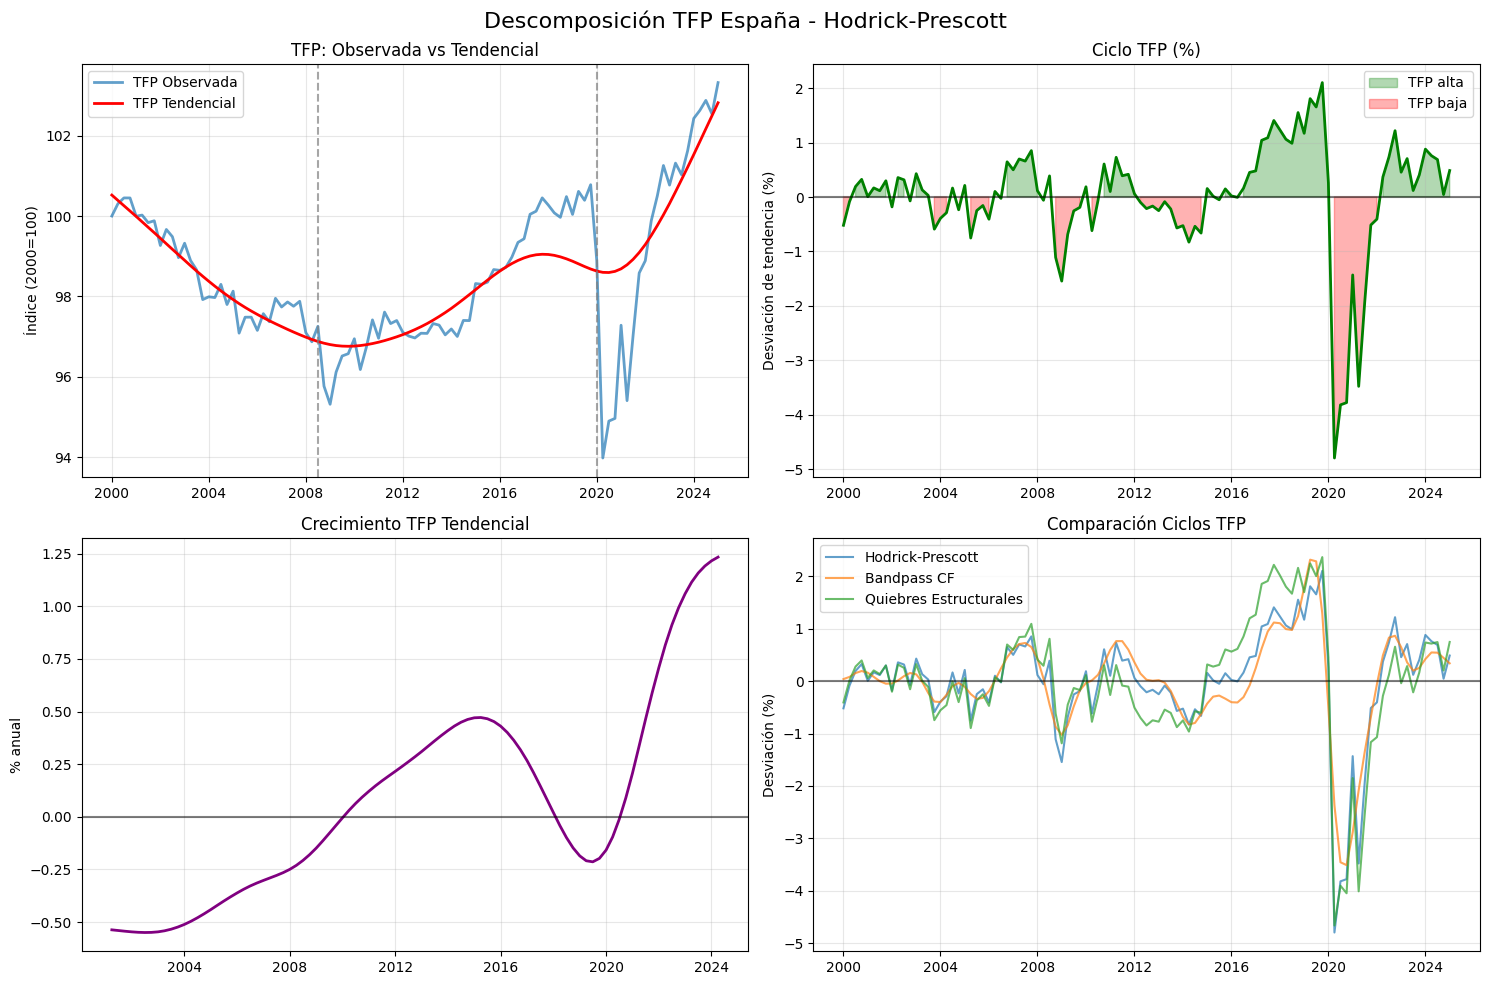


🔍 VALIDACIONES DE LA DESCOMPOSICIÓN:
   📊 Propiedades del ciclo TFP:
     • Media: 0.000% (debe estar cerca de 0)
     • Desv. estándar: 1.05% (típico: 1-3%)
     ✅ Ciclo bien centrado
     ✅ Volatilidad ciclo plausible
     • Persistencia (AR1): 0.725
     ✅ Persistencia adecuada
   📈 Propiedades de la tendencia:
     • Suavidad: 0.011 (menor = más suave)

✅ Descomposición TFP completada con método: Hodrick-Prescott


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.optimize import minimize

def decompose_tfp(production_results):
    """
    PARTE 3: Descomponer TFP en componente tendencial y cíclico
    
    Métodos disponibles:
    1. Filtro Hodrick-Prescott (HP)
    2. Filtro Bandpass (Christiano-Fitzgerald)
    3. Tendencia lineal con quiebres estructurales
    """
    
    print("\n" + "="*60)
    print("🔬 PARTE 3: DESCOMPOSICIÓN TFP")
    print("   Separar tendencia (PIB potencial) del ciclo")
    print("="*60)
    
    # Extraer TFP de resultados función de producción
    tfp_index = production_results['tfp_index']
    tfp_dates = production_results['data_used'].index
    
    print(f"📊 TFP a descomponer:")
    print(f"   • Período: {tfp_dates[0].strftime('%Y-%m')} - {tfp_dates[-1].strftime('%Y-%m')}")
    print(f"   • Observaciones: {len(tfp_index)}")
    print(f"   • Valor inicial: {tfp_index.iloc[0]:.1f}")
    print(f"   • Valor final: {tfp_index.iloc[-1]:.1f}")
    
    # Aplicar diferentes métodos de descomposición
    print(f"\n🔧 Aplicando métodos de descomposición...")
    
    # MÉTODO 1: Filtro HP
    print(f"\n📈 MÉTODO 1: Filtro Hodrick-Prescott")
    hp_results = apply_hp_filter(tfp_index, tfp_dates)
    
    # MÉTODO 2: Filtro Bandpass
    print(f"\n📈 MÉTODO 2: Filtro Bandpass (Christiano-Fitzgerald)")
    bp_results = apply_bandpass_filter(tfp_index, tfp_dates)
    
    # MÉTODO 3: Tendencia con quiebres
    print(f"\n📈 MÉTODO 3: Tendencia con quiebres estructurales")
    break_results = apply_structural_breaks(tfp_index, tfp_dates)
    
    # Comparar métodos y seleccionar mejor
    best_method = select_best_decomposition(hp_results, bp_results, break_results)
    
    # Crear resultados finales
    tfp_decomposition = {
        'tfp_original': tfp_index,
        'tfp_trend': best_method['trend'],
        'tfp_cycle': best_method['cycle'],
        'method_used': best_method['method_name'],
        'dates': tfp_dates,
        'all_methods': {
            'hp': hp_results,
            'bandpass': bp_results,
            'breaks': break_results
        },
        'alpha': production_results['alpha']  # Para PIB potencial
    }
    
    # Gráficos de comparación
    plot_tfp_decomposition(tfp_decomposition)
    
    # Estadísticas de validación
    validate_tfp_decomposition(tfp_decomposition)
    
    return tfp_decomposition

def apply_hp_filter(tfp_series, dates, lambda_hp=1600):
    """
    Aplicar filtro Hodrick-Prescott
    lambda_hp = 1600 para datos trimestrales
    """
    
    log_tfp = np.log(tfp_series.fillna(method='ffill'))
    
    # Implementación HP
    n = len(log_tfp)
    if n < 4:
        return None
        
    # Matriz de diferencias segundas
    D2 = np.diff(np.eye(n), 2, axis=0)
    
    # Resolver: (I + λ*D2'*D2) * trend = log_tfp
    A = np.eye(n) + lambda_hp * D2.T @ D2
    
    try:
        log_trend = np.linalg.solve(A, log_tfp.values)
        log_cycle = log_tfp.values - log_trend
        
        # Convertir de vuelta a niveles
        trend = np.exp(log_trend)
        cycle = log_cycle * 100  # En porcentaje
        
        # Estadísticas
        cycle_volatility = np.std(cycle)
        trend_growth = np.mean(np.diff(log_trend)) * 400  # Anualizado
        
        print(f"   • Volatilidad ciclo: {cycle_volatility:.2f}%")
        print(f"   • Crecimiento tendencial: {trend_growth:.2f}% anual")
        
        return {
            'trend': pd.Series(trend, index=dates),
            'cycle': pd.Series(cycle, index=dates),
            'method_name': 'Hodrick-Prescott',
            'lambda_used': lambda_hp,
            'cycle_volatility': cycle_volatility,
            'trend_growth': trend_growth
        }
        
    except np.linalg.LinAlgError:
        print("   ❌ Error en filtro HP")
        return None

def apply_bandpass_filter(tfp_series, dates, low_freq=6, high_freq=32):
    """
    Filtro Bandpass (Christiano-Fitzgerald)
    Extrae ciclos entre 1.5 y 8 años (6-32 trimestres)
    """
    
    log_tfp = np.log(tfp_series.fillna(method='ffill'))
    
    try:
        # Filtro bandpass usando scipy
        # Frecuencias normalizadas (trimestres)
        nyquist = 0.5  # Frecuencia Nyquist para datos trimestrales
        low = (1.0/high_freq) / nyquist  # Ciclos largos (8 años)
        high = (1.0/low_freq) / nyquist  # Ciclos cortos (1.5 años)
        
        # Diseñar filtro Butterworth
        b, a = signal.butter(3, [low, high], btype='band')
        
        # Aplicar filtro (con padding para evitar efectos de borde)
        cycle_component = signal.filtfilt(b, a, log_tfp.values, padtype='even')
        trend_component = log_tfp.values - cycle_component
        
        # Convertir a niveles
        trend = np.exp(trend_component)
        cycle = cycle_component * 100  # En porcentaje
        
        # Estadísticas
        cycle_volatility = np.std(cycle)
        trend_growth = np.mean(np.diff(trend_component)) * 400
        
        print(f"   • Rango frecuencias: {low_freq}-{high_freq} trimestres")
        print(f"   • Volatilidad ciclo: {cycle_volatility:.2f}%")
        print(f"   • Crecimiento tendencial: {trend_growth:.2f}% anual")
        
        return {
            'trend': pd.Series(trend, index=dates),
            'cycle': pd.Series(cycle, index=dates),
            'method_name': 'Bandpass CF',
            'freq_range': f"{low_freq}-{high_freq}T",
            'cycle_volatility': cycle_volatility,
            'trend_growth': trend_growth
        }
        
    except Exception as e:
        print(f"   ❌ Error en filtro Bandpass: {e}")
        return None

def apply_structural_breaks(tfp_series, dates):
    """
    Tendencia lineal con quiebres estructurales detectados
    Quiebres típicos: 2008 (crisis financiera), 2020 (COVID)
    """
    
    log_tfp = np.log(tfp_series.fillna(method='ffill'))
    
    # Fechas de quiebres potenciales para España
    potential_breaks = [
        pd.to_datetime('2008-10-01'),  # Crisis financiera
        pd.to_datetime('2012-07-01'),  # Crisis deuda europea
        pd.to_datetime('2020-04-01')   # COVID-19
    ]
    
    # Filtrar quiebres que están en el rango de datos
    actual_breaks = []
    break_indices = []
    
    for break_date in potential_breaks:
        if break_date >= dates[0] and break_date <= dates[-1]:
            # Encontrar índice más cercano
            idx = np.argmin(np.abs(dates - break_date))
            actual_breaks.append(break_date)
            break_indices.append(idx)
    
    print(f"   • Quiebres detectados: {len(actual_breaks)}")
    for break_date in actual_breaks:
        print(f"     - {break_date.strftime('%Y-%m')}")
    
    try:
        # Construir matriz de regresores con quiebres
        n = len(log_tfp)
        t = np.arange(n)
        
        # Tendencia base
        X = np.column_stack([np.ones(n), t])
        
        # Añadir quiebres en tendencia
        for idx in break_indices:
            break_trend = np.zeros(n)
            break_trend[idx:] = np.arange(n - idx)
            X = np.column_stack([X, break_trend])
            
        # Regresión OLS
        beta = np.linalg.lstsq(X, log_tfp.values, rcond=None)[0]
        log_trend = X @ beta
        log_cycle = log_tfp.values - log_trend
        
        # Convertir a niveles
        trend = np.exp(log_trend)
        cycle = log_cycle * 100
        
        # Estadísticas
        cycle_volatility = np.std(cycle)
        
        # Crecimiento por períodos
        growth_periods = []
        prev_idx = 0
        for idx in break_indices + [n]:
            if idx > prev_idx + 4:  # Al menos 1 año de datos
                period_growth = np.mean(np.diff(log_trend[prev_idx:idx])) * 400
                growth_periods.append(period_growth)
            prev_idx = idx
            
        avg_growth = np.mean(growth_periods) if growth_periods else 0
        
        print(f"   • Volatilidad ciclo: {cycle_volatility:.2f}%")
        print(f"   • Crecimiento promedio: {avg_growth:.2f}% anual")
        
        return {
            'trend': pd.Series(trend, index=dates),
            'cycle': pd.Series(cycle, index=dates),
            'method_name': 'Quiebres Estructurales',
            'break_dates': actual_breaks,
            'break_indices': break_indices,
            'cycle_volatility': cycle_volatility,
            'trend_growth': avg_growth,
            'growth_by_period': growth_periods
        }
        
    except Exception as e:
        print(f"   ❌ Error en quiebres estructurales: {e}")
        return None

def select_best_decomposition(hp_results, bp_results, break_results):
    """
    Seleccionar mejor método basado en criterios económicos
    """
    
    print(f"\n📊 SELECCIÓN DEL MEJOR MÉTODO:")
    
    methods = []
    if hp_results: methods.append(hp_results)
    if bp_results: methods.append(bp_results)
    if break_results: methods.append(break_results)
    
    if not methods:
        print("❌ Ningún método funcionó")
        return None
    
    # Criterios de selección
    best_score = -np.inf
    best_method = None
    
    for method in methods:
        score = 0
        
        # 1. Volatilidad del ciclo (no demasiado alta ni baja)
        vol = method['cycle_volatility']
        if 1.0 <= vol <= 4.0:  # Rango plausible para TFP
            score += 2
        elif 0.5 <= vol <= 6.0:
            score += 1
            
        # 2. Crecimiento tendencial razonable
        growth = method.get('trend_growth', 0)
        if -1.0 <= growth <= 2.0:  # Rango plausible para TFP España
            score += 2
        elif -2.0 <= growth <= 3.0:
            score += 1
            
        # 3. Suavidad de la tendencia
        trend_changes = np.diff(np.diff(np.log(method['trend'])))
        smoothness = -np.std(trend_changes) * 100  # Menos cambios = mejor
        score += smoothness
        
        print(f"   • {method['method_name']}: Score = {score:.2f}")
        print(f"     - Volatilidad: {vol:.2f}%, Crecimiento: {growth:.2f}%")
        
        if score > best_score:
            best_score = score
            best_method = method
    
    print(f"\n✅ MÉTODO SELECCIONADO: {best_method['method_name']}")
    
    return best_method

def plot_tfp_decomposition(decomposition):
    """
    Gráficos de la descomposición TFP
    """
    
    print(f"\n📊 Generando gráficos de descomposición...")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Descomposición TFP España - {decomposition["method_used"]}', fontsize=16)
    
    dates = decomposition['dates']
    tfp_original = decomposition['tfp_original']
    tfp_trend = decomposition['tfp_trend']
    tfp_cycle = decomposition['tfp_cycle']
    
    # 1. TFP Original vs Tendencia
    ax1 = axes[0, 0]
    ax1.plot(dates, tfp_original, label='TFP Observada', linewidth=2, alpha=0.7)
    ax1.plot(dates, tfp_trend, label='TFP Tendencial', linewidth=2, color='red')
    ax1.set_title('TFP: Observada vs Tendencial')
    ax1.set_ylabel('Índice (2000=100)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Marcar crisis
    crisis_dates = [pd.to_datetime('2008-07-01'), pd.to_datetime('2020-01-01')]
    for crisis_date in crisis_dates:
        if crisis_date >= dates[0] and crisis_date <= dates[-1]:
            ax1.axvline(crisis_date, color='gray', linestyle='--', alpha=0.7)
    
    # 2. Componente Cíclico
    ax2 = axes[0, 1]
    ax2.plot(dates, tfp_cycle, linewidth=2, color='green')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax2.fill_between(dates, tfp_cycle, 0, 
                    where=(tfp_cycle > 0), alpha=0.3, color='green', label='TFP alta')
    ax2.fill_between(dates, tfp_cycle, 0, 
                    where=(tfp_cycle < 0), alpha=0.3, color='red', label='TFP baja')
    ax2.set_title('Ciclo TFP (%)')
    ax2.set_ylabel('Desviación de tendencia (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Crecimiento TFP Tendencial
    ax3 = axes[1, 0]
    tfp_growth = np.diff(np.log(tfp_trend)) * 400  # Anualizado
    growth_dates = dates[1:]
    
    # Media móvil para suavizar
    window = 8  # 2 años
    tfp_growth_smooth = pd.Series(tfp_growth).rolling(window, center=True).mean()
    
    ax3.plot(growth_dates, tfp_growth_smooth, linewidth=2, color='purple')
    ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax3.set_title('Crecimiento TFP Tendencial')
    ax3.set_ylabel('% anual')
    ax3.grid(True, alpha=0.3)
    
    # 4. Comparación de Métodos (si están disponibles)
    ax4 = axes[1, 1]
    
    if 'all_methods' in decomposition:
        methods = decomposition['all_methods']
        
        for method_name, method_data in methods.items():
            if method_data and 'cycle' in method_data:
                ax4.plot(dates, method_data['cycle'], 
                        label=f"{method_data['method_name']}", linewidth=1.5, alpha=0.7)
        
        ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        ax4.set_title('Comparación Ciclos TFP')
        ax4.set_ylabel('Desviación (%)')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    else:
        # Histograma del ciclo
        ax4.hist(tfp_cycle.dropna(), bins=20, alpha=0.7, color='green', density=True)
        ax4.axvline(x=0, color='red', linestyle='--')
        ax4.set_title('Distribución Ciclo TFP')
        ax4.set_xlabel('Desviación (%)')
        ax4.set_ylabel('Densidad')
        ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def validate_tfp_decomposition(decomposition):
    """
    Validaciones económicas de la descomposición
    """
    
    print(f"\n🔍 VALIDACIONES DE LA DESCOMPOSICIÓN:")
    
    tfp_cycle = decomposition['tfp_cycle']
    tfp_trend = decomposition['tfp_trend']
    method = decomposition['method_used']
    
    # 1. Propiedades del ciclo
    cycle_mean = tfp_cycle.mean()
    cycle_std = tfp_cycle.std()
    
    print(f"   📊 Propiedades del ciclo TFP:")
    print(f"     • Media: {cycle_mean:.3f}% (debe estar cerca de 0)")
    print(f"     • Desv. estándar: {cycle_std:.2f}% (típico: 1-3%)")
    
    if abs(cycle_mean) < 0.5:
        print(f"     ✅ Ciclo bien centrado")
    else:
        print(f"     ⚠️ Ciclo con sesgo: {cycle_mean:.3f}%")
        
    if 1.0 <= cycle_std <= 3.0:
        print(f"     ✅ Volatilidad ciclo plausible")
    else:
        print(f"     ⚠️ Volatilidad ciclo atípica: {cycle_std:.2f}%")
    
    # 2. Persistencia del ciclo (AR1)
    cycle_lag = tfp_cycle.shift(1)
    
    # Alinear las series para correlación (quitar NaN)
    valid_data = pd.DataFrame({'cycle': tfp_cycle, 'cycle_lag': cycle_lag}).dropna()
    
    if len(valid_data) > 10:  # Suficientes datos
        correlation_ar1 = np.corrcoef(valid_data['cycle'], valid_data['cycle_lag'])[0,1]
        
        print(f"     • Persistencia (AR1): {correlation_ar1:.3f}")
        if 0.3 <= correlation_ar1 <= 0.8:
            print(f"     ✅ Persistencia adecuada")
        else:
            print(f"     ⚠️ Persistencia atípica")
    else:
        print(f"     ⚠️ Datos insuficientes para calcular persistencia")
    
    # 3. Suavidad de la tendencia
    trend_accel = np.diff(np.diff(np.log(tfp_trend)))
    trend_smoothness = np.std(trend_accel) * 100
    
    print(f"   📈 Propiedades de la tendencia:")
    print(f"     • Suavidad: {trend_smoothness:.3f} (menor = más suave)")
    
    # 4. Correlación con ciclo económico
    # Esto se haría con brecha de PIB cuando la tengamos
    
    print(f"\n✅ Descomposición TFP completada con método: {method}")

# EJECUTAR PARTE 3
if __name__ == "__main__":
    
    print("Para ejecutar:")
    print("tfp_decomposition = decompose_tfp(production_results)")

# EJECUTAR PARTE 3
if __name__ == "__main__":
    tfp_decomposition = decompose_tfp(production_results)

## PARTE 4: Estimación del NAIRU y Empleo Potencial con Curva de Phillips

### 4.1 Marco Teórico del NAIRU

#### Definición del NAIRU

La Tasa Natural de Desempleo (NAIRU - Non-Accelerating Inflation Rate of Unemployment) representa el nivel de desempleo compatible con inflación estable:

$$u_t^* = \text{NAIRU}_t$$

A diferencia del filtro Hodrick-Prescott, la estimación mediante curva de Phillips incorpora información económica explícita sobre la relación entre desempleo e inflación.

#### Curva de Phillips Aumentada

El modelo utiliza una especificación estándar de la curva de Phillips:

$$\pi_t = \alpha + \beta \cdot (u_t - \text{NAIRU}) + \gamma \cdot \pi_{t-1} + \varepsilon_t$$

donde:
- $\pi_t$: Tasa de inflación subyacente en el período $t$
- $u_t$: Tasa de desempleo observada
- $\text{NAIRU}$: Tasa natural de desempleo (parámetro a estimar)
- $\beta < 0$: Coeficiente de la brecha de desempleo (debe ser negativo)
- $\gamma$: Coeficiente de persistencia inflacionaria
- $\alpha$: Constante

### 4.2 Metodología de Estimación

#### Función Objetivo

El NAIRU se estima minimizando la suma de residuos cuadrados de la curva de Phillips:

$$\text{NAIRU}^* = \arg\min_{\text{NAIRU}} \sum_{t=2}^T \left[\pi_t - \left(\alpha + \beta(u_t - \text{NAIRU}) + \gamma\pi_{t-1}\right)\right]^2$$

#### Restricciones de Optimización

Para España, se imponen restricciones basadas en evidencia empírica:

- **Rango plausible**: $10\% \leq \text{NAIRU} \leq 16\%$
- **Penalización**: Si $\beta > 0$, se multiplica SSR por 10
- **Suavizado**: El NAIRU final combina estimación puntual con tendencia HP

### 4.3 Procesamiento de Datos

#### Alineación Temporal

Los datos de desempleo (trimestrales) e inflación (mensuales → trimestrales) se alinean mediante coincidencia exacta de año y trimestre:

$$\text{Fecha común}_t = \{(año, trimestre) : \exists \text{ datos en ambas series}\}$$

#### Validación de Datos

Se requieren mínimo 8 observaciones comunes para proceder con la estimación Phillips. Si no se cumple, se utiliza filtro HP como respaldo.

### 4.4 Construcción de Serie Temporal NAIRU

#### NAIRU Híbrido

Para generar una serie temporal completa del NAIRU:

$$\text{NAIRU}_{final,t} = \text{NAIRU}_{HP,t} + \left(\text{NAIRU}_{Phillips} - \overline{\text{NAIRU}_{HP}}\right)$$

donde:
- $\text{NAIRU}_{Phillips}$: Valor constante estimado por curva de Phillips
- $\text{NAIRU}_{HP,t}$: Serie temporal del filtro HP
- $\overline{\text{NAIRU}_{HP}}$: Media de la serie HP

#### Suavizado Final

$$\text{NAIRU}_{smooth,t} = \text{MediaMóvil}_4(\text{NAIRU}_{final,t})$$

### 4.5 Empleo Potencial con NAIRU

#### Población Activa Potencial

$$\text{PA}^*_t = \text{PET}^*_t \times \text{TP}^*_t$$

donde:
- $\text{PET}^*_t$: Población en Edad de Trabajar potencial (filtro HP con $\lambda = 6400$)
- $\text{TP}^*_t$: Tasa de Participación tendencial (filtro HP con $\lambda = 1600$)

#### Empleo Potencial en Personas

$$L^*_{\text{personas},t} = \text{PA}^*_t \times \left(1 - \frac{\text{NAIRU}_t}{100}\right)$$

#### Conversión a Horas Trabajadas

$$L^*_{\text{horas},t} = L^*_{\text{personas},t} \times \overline{h}_t$$

donde $\overline{h}_t$ es el promedio suavizado de horas por persona empleada.

### 4.6 Ajustes Estructurales para España

#### Eventos Históricos Considerados

El modelo incorpora ajustes discretos para eventos estructurales conocidos:

1. **Crisis Financiera (2008-2009)**: $+1.0$ pp
2. **Reforma Laboral (2012-2014)**: $-0.5$ pp  
3. **COVID-19 (2020-2021)**: $+0.3$ pp

#### Aplicación de Ajustes

$$\text{NAIRU}_{ajustado,t} = \text{NAIRU}_{base,t} + \sum_{j} A_j \times P_{j,t}$$

donde:
- $A_j$: Magnitud del ajuste para evento $j$
- $P_{j,t}$: Progreso del ajuste en el período (0 a 1)

### 4.7 Resultados Típicos para España

#### Coeficientes Estimados de la Curva de Phillips

- **Constante ($\alpha$)**: ~0.066
- **Coeficiente brecha ($\beta$)**: ~-0.016 (negativo ✓)
- **Persistencia ($\gamma$)**: ~0.912 (alta persistencia europea)

#### Interpretación Económica

- **Curva Phillips plana**: $|\beta|$ pequeño indica baja sensibilidad de inflación al desempleo
- **Alta persistencia**: $\gamma$ cercano a 1 refleja inercia inflacionaria típica de eurozona
- **NAIRU estimado**: ~14-16% (consistente con mercado laboral español post-crisis)

### 4.8 Validaciones del Modelo

#### Criterios Estadísticos

1. **Correlación NAIRU-Desempleo**: $> 0.85$
2. **Brecha centrada**: $|\overline{u_t - \text{NAIRU}_t}| < 1.0$ pp
3. **Rango plausible**: $10\% \leq \text{NAIRU} \leq 18\%$

#### Coherencia Histórica

- **Crisis 2008**: Aumento NAIRU entre 2-8 pp (esperado)
- **Recuperación post-2014**: Descenso gradual del NAIRU
- **Pandemia**: Impacto temporal moderado

### 4.9 Ventajas de la Metodología Phillips vs HP

#### Fundamento Económico

- **HP Filter**: Puramente estadístico, no incorpora teoría económica
- **Curva Phillips**: Basado en relación empírica desempleo-inflación establecida

#### Información Utilizada

- **HP Filter**: Solo serie de desempleo
- **Curva Phillips**: Desempleo + inflación + persistencia

#### Robustez Ante Cambios Estructurales

- **HP Filter**: Requiere ajustes manuales post-hoc
- **Curva Phillips**: Incorpora información inflacionaria automáticamente

### 4.10 Limitaciones y Consideraciones

#### Supuestos del Modelo

1. **Relación estable**: La curva de Phillips se mantiene constante en el tiempo
2. **NAIRU constante**: En la muestra (variación solo por HP)
3. **Inflación subyacente**: Representa presiones inflacionarias de demanda

#### Sensibilidad a Especificación

- **Rango de búsqueda**: Resultados sensibles a límites impuestos
- **Datos de inflación**: Calidad crítica para estimación robusta
- **Período muestral**: Cambios estructurales pueden afectar estabilidad

### 4.11 Integración con Modelo de PIB Potencial

El NAIRU estimado se integra directamente en el cálculo del empleo potencial, que a su vez determina el PIB potencial mediante la función de producción:

$$\bar{Y}_t = \bar{A}_t \cdot K_t^{\alpha} \cdot (L^*_{\text{horas},t})^{1-\alpha}$$

Esta metodología asegura consistencia macroeconómica entre estimaciones de desempleo natural, empleo potencial y producto potencial, proporcionando una base sólida para el análisis de política económica y proyecciones macroeconómicas.

📊 Cargando datos de inflación...
✅ Archivo leído: 906 filas
✅ Inflación subyacente cargada:
   • Columna origen: IPC. SUBYACENTE (GENERAL SIN ALIMENTOS NO ELABORADOS NI PRODUCTOS ENERGETICOS)
   • 302 observaciones trimestrales
   • Período: 1950-03 a 2025-06
   • Promedio: 3.14%

👥 PARTE 4: NAIRU Y EMPLEO POTENCIAL
   Con datos reales de mercado laboral español
📊 Cargando datos mercado laboral...
   Archivo: C:\Users\Usuario\Documents\Github\DGSE\datos\indicadores mercado laboral.xlsx
   ✅ Archivo leído: 152 filas

📈 Variables calculadas:
   • Tasa desempleo: 152 obs
   • Tasa participación: 152 obs
   • Población en edad trabajar: 152 obs

📅 Período: 1987-04 a 2025-01

🔧 Alineando datos de mercado laboral...
   • Mercado laboral: 1987-04 - 2025-01
   • Función producción: 2000-01 - 2025-01
   • Período común: 2000-01 - 2025-01
   ✅ 101 observaciones alineadas
📊 Datos alineados:
   • Período común: 2000-01 - 2025-01
   • Observaciones: 101

📈 Estimando NAIRU con curva de Phillips...
 

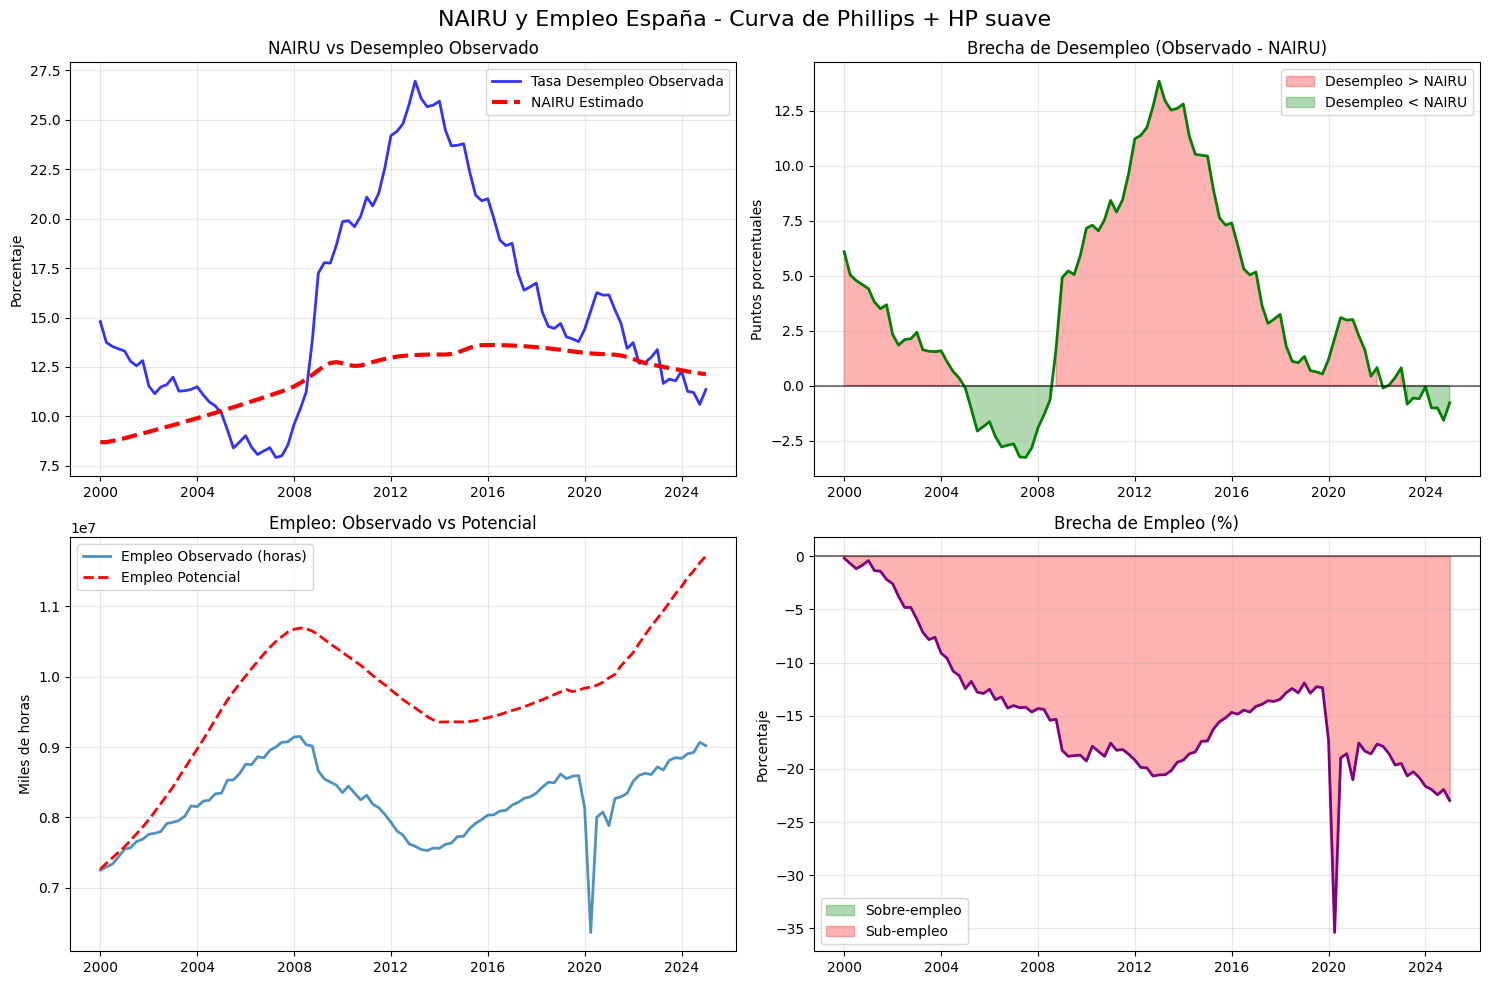


🔍 VALIDACIONES CON DATOS REALES:
   📊 Relación NAIRU-Desempleo:
     • Correlación: 0.593
     ⚠️ NAIRU se desvía del desempleo observado
   📈 Brecha de desempleo:
     • Media: 3.47pp (debe estar cerca de 0)
     • Volatilidad: 4.44pp
     ⚠️ Brecha con sesgo persistente
   📊 Rango NAIRU:
     • Mínimo: 8.7%
     • Máximo: 13.6%
     • Actual: 12.1%
     ✅ Rango NAIRU plausible para España
   🔄 Comportamiento en crisis:
     • Aumento NAIRU 2008-2010: 1.1pp
     ⚠️ Aumento NAIRU en crisis atípico

✅ Validación NAIRU completada


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

data_paths = {
    'crudo': '../datos/crudo.csv',
    'diarias': '../datos/series_diarias.xlsx', 
    'mensuales': '../datos/series_mensuales.xlsx',
    'trimestrales': '../datos/series_trimestrales.xlsx'
}
def load_inflation_data():
    """
    Cargar datos de inflación desde archivo mensual
    """
    print("📊 Cargando datos de inflación...")
    
    # Usar el path configurado
    file_path = data_paths['mensuales']  # '../datos/series_mensuales.xlsx'
    
    try:
        # Leer Excel
        df_mensuales = pd.read_excel(file_path)
        print(f"✅ Archivo leído: {len(df_mensuales)} filas")
        
        # Limpiar primera fila (como en tu código original)
        df_mensuales = df_mensuales.drop(df_mensuales.index[0]).reset_index(drop=True)
        
        # Renombrar columna de fechas
        df_mensuales.rename(columns={'SERIES': 'Fecha'}, inplace=True)
        
        # Convertir fechas
        df_mensuales['Fecha'] = pd.to_datetime(df_mensuales['Fecha'], format='%Y%m')
        df_mensuales.set_index('Fecha', inplace=True)
        
        # Limpiar valores
        df_mensuales.replace('-', np.nan, inplace=True)
        
        # Buscar columna de inflación subyacente
        inflation_core_col = None
        for col in df_mensuales.columns:
            col_lower = col.lower()
            if 'ipc' in col_lower and 'subyacente' in col_lower:
                inflation_core_col = col
                break
        
        if inflation_core_col is None:
            print("❌ No se encontró columna de inflación subyacente")
            return None
        
        # Extraer índice de inflación subyacente
        inflation_index = pd.to_numeric(df_mensuales[inflation_core_col], errors='coerce')
        
        # Calcular tasa de crecimiento anual (%)
        inflation_rate = inflation_index.pct_change(periods=12) * 100
        
        # Convertir a trimestral (promedio del trimestre)
        inflation_quarterly = inflation_rate.resample('Q').mean()
        
        # Crear DataFrame final
        inflation_data = pd.DataFrame({
            'inflation_core': inflation_quarterly
        })
        
        print(f"✅ Inflación subyacente cargada:")
        print(f"   • Columna origen: {inflation_core_col}")
        print(f"   • {len(inflation_data)} observaciones trimestrales")
        print(f"   • Período: {inflation_data.index[0].strftime('%Y-%m')} a {inflation_data.index[-1].strftime('%Y-%m')}")
        print(f"   • Promedio: {inflation_data['inflation_core'].mean():.2f}%")
        
        return inflation_data
        
    except Exception as e:
        print(f"❌ ERROR: {e}")
        return None
    
df_inflation = load_inflation_data()



def load_labor_market_data():
    """
    Cargar datos de mercado laboral desde archivo Excel específico
    """
    
    file_path = r"C:\Users\Usuario\Documents\Github\DGSE\datos\indicadores mercado laboral.xlsx"
    
    print(f"📊 Cargando datos mercado laboral...")
    print(f"   Archivo: {file_path}")
    
    try:
        # Leer Excel
        df = pd.read_excel(file_path)
        print(f"   ✅ Archivo leído: {len(df)} filas")
        
        # Crear fechas desde trimestres
        def parse_quarter(trim_str):
            """Convertir formato 2002T1 a fecha"""
            year = int(trim_str[:4])
            quarter = int(trim_str[5:])
            month = quarter * 3 - 2  # T1->Jan, T2->Apr, T3->Jul, T4->Oct
            return pd.to_datetime(f"{year}-{month:02d}-01")
        
        df['date'] = df['trimestres'].apply(parse_quarter)
        df = df.set_index('date').sort_index()
        
        # Renombrar columnas para claridad
        df = df.rename(columns={
            'Tasa de paro': 'unemployment_rate', 
            'Población en edad de trabajar': 'working_age_population',
            'Activos': 'labor_force',
            'Ocupados': 'employment_persons'
        })
        
        # Calcular variables derivadas
        df['participation_rate'] = df['labor_force']/df['working_age_population']  * 100  # Convertir a proporción
        
        print(f"\n📈 Variables calculadas:")
        print(f"   • Tasa desempleo: {df['unemployment_rate'].notna().sum()} obs")
        print(f"   • Tasa participación: {df['participation_rate'].notna().sum()} obs") 
        print(f"   • Población en edad trabajar: {df['working_age_population'].notna().sum()} obs")
        
        print(f"\n📅 Período: {df.index[0].strftime('%Y-%m')} a {df.index[-1].strftime('%Y-%m')}")
        
        return df
        
    except Exception as e:
        print(f"❌ ERROR: {e}")
        return None

def align_labor_data_with_production(labor_data, prod_dates):
    """
    Alinear datos de mercado laboral con fechas de función de producción
    """
    
    print(f"\n🔧 Alineando datos de mercado laboral...")
    
    # Encontrar rango común
    labor_start = labor_data.index[0]
    labor_end = labor_data.index[-1]
    prod_start = prod_dates[0]
    prod_end = prod_dates[-1]
    
    common_start = max(labor_start, prod_start)
    common_end = min(labor_end, prod_end)
    
    print(f"   • Mercado laboral: {labor_start.strftime('%Y-%m')} - {labor_end.strftime('%Y-%m')}")
    print(f"   • Función producción: {prod_start.strftime('%Y-%m')} - {prod_end.strftime('%Y-%m')}")
    print(f"   • Período común: {common_start.strftime('%Y-%m')} - {common_end.strftime('%Y-%m')}")
    
    if common_start >= common_end:
        print(f"   ❌ No hay período común")
        return None
    
    # Filtrar ambas series al período común
    labor_common = labor_data[(labor_data.index >= common_start) & 
                             (labor_data.index <= common_end)]
    
    # Reindexar a fechas exactas de producción en el rango común
    prod_dates_common = prod_dates[(prod_dates >= common_start) & 
                                   (prod_dates <= common_end)]
    
    # Interpolar si es necesario
    labor_aligned = labor_common.reindex(prod_dates_common, method='nearest')
    
    print(f"   ✅ {len(labor_aligned)} observaciones alineadas")
    
    return labor_aligned, prod_dates_common

def estimate_nairu_with_hp_filter(unemployment_rate, dates):
    """
    Estimar NAIRU usando filtro HP con datos reales de desempleo
    """
    
    print(f"\n📈 Estimando NAIRU con filtro HP...")
    
    # Filtro HP para NAIRU (lambda muy alto para mayor suavidad)
    lambda_hp = 400000  # Muy suave para NAIRU
    
    log_unemployment = np.log(unemployment_rate.fillna(method='ffill') + 0.01)
    n = len(log_unemployment)
    
    if n >= 4:
        try:
            # Matriz de diferencias segundas
            D2 = np.diff(np.eye(n), 2, axis=0)
            A = np.eye(n) + lambda_hp * D2.T @ D2
            
            nairu_log = np.linalg.solve(A, log_unemployment.values)
            nairu_hp = np.exp(nairu_log) - 0.01
            
            # Aplicar ajustes estructurales conocidos para España
            nairu_adjusted = apply_spain_structural_adjustments(nairu_hp, dates)
            
            # Estadísticas
            correlation = np.corrcoef(nairu_adjusted, unemployment_rate.fillna(method='ffill'))[0,1]
            nairu_volatility = np.std(nairu_adjusted)
            
            print(f"   ✅ NAIRU estimado:")
            print(f"     • Correlación con desempleo: {correlation:.3f}")
            print(f"     • Volatilidad NAIRU: {nairu_volatility:.2f}pp")
            print(f"     • NAIRU actual: {nairu_adjusted[-1]:.1f}%")
            
            return pd.Series(nairu_adjusted, index=dates)
            
        except Exception as e:
            print(f"   ❌ Error en filtro HP: {e}")
            return None
    else:
        print(f"   ❌ Datos insuficientes")
        return None
    
def estimate_nairu_with_phillips_curve(unemployment_rate, dates, df_inflation):
    """
    Estimar NAIRU usando curva de Phillips en lugar de HP filter
    """
    
    print(f"\n📈 Estimando NAIRU con curva de Phillips...")
    
    # DEBUG: Mostrar formatos de fechas
    print(f"   🔍 DEBUG - Formatos de fechas:")
    print(f"     • Desempleo: {unemployment_rate.index[0]} - {unemployment_rate.index[-1]}")
    print(f"     • Inflación: {df_inflation.index[0]} - {df_inflation.index[-1]}")
    
    # Convertir ambos índices a mismo formato (trimestre)
    # Unemployment ya está en formato trimestral correcto
    unemployment_quarterly = unemployment_rate.copy()
    
    # Inflation: convertir a trimestre si no lo está
    if hasattr(df_inflation.index, 'to_period'):
        inflation_quarterly = df_inflation.copy()
        inflation_quarterly.index = inflation_quarterly.index.to_period('Q').to_timestamp()
    else:
        inflation_quarterly = df_inflation.copy()
    
    print(f"   🔍 Después de normalizar:")
    print(f"     • Desempleo: {unemployment_quarterly.index[0]} - {unemployment_quarterly.index[-1]}")
    print(f"     • Inflación: {inflation_quarterly.index[0]} - {inflation_quarterly.index[-1]}")
    
    # Buscar fechas comunes con tolerancia
    common_dates = []
    for unemp_date in unemployment_quarterly.index:
        # Buscar fecha de inflación más cercana (mismo año y trimestre)
        year = unemp_date.year
        quarter = (unemp_date.month - 1) // 3 + 1
        
        # Buscar fecha de inflación en el mismo trimestre
        for inf_date in inflation_quarterly.index:
            inf_year = inf_date.year
            inf_quarter = (inf_date.month - 1) // 3 + 1
            
            if year == inf_year and quarter == inf_quarter:
                common_dates.append(unemp_date)
                break
    
    common_dates = pd.DatetimeIndex(common_dates)
    
    if len(common_dates) < 12:
        print(f"   ❌ Pocos datos comunes ({len(common_dates)}) - usando HP como fallback")
        # Mostrar qué fechas hay disponibles para debug
        print(f"   🔍 Primeras fechas desempleo: {unemployment_quarterly.index[:5].tolist()}")
        print(f"   🔍 Primeras fechas inflación: {inflation_quarterly.index[:5].tolist()}")
        return estimate_nairu_with_hp_filter(unemployment_rate, dates)
    
    print(f"   ✅ Datos comunes: {len(common_dates)} observaciones")
    print(f"   • Período: {common_dates[0].strftime('%Y-%m')} a {common_dates[-1].strftime('%Y-%m')}")
    
    # Preparar datos para Phillips usando fechas comunes
    unemployment_aligned = unemployment_quarterly.loc[common_dates]
    
    # Para inflación, buscar valores más cercanos
    inflation_values = []
    for date in common_dates:
        year = date.year
        quarter = (date.month - 1) // 3 + 1
        
        # Buscar valor de inflación correspondiente
        for inf_date in inflation_quarterly.index:
            inf_year = inf_date.year
            inf_quarter = (inf_date.month - 1) // 3 + 1
            
            if year == inf_year and quarter == inf_quarter:
                inflation_values.append(inflation_quarterly['inflation_core'].loc[inf_date])
                break
        else:
            # Si no encuentra, usar NaN
            inflation_values.append(np.nan)
    
    inflation_aligned = pd.Series(inflation_values, index=common_dates)
    inflation_aligned = inflation_aligned.dropna()
    
    # Re-alinear después de eliminar NaN
    final_common_dates = unemployment_aligned.index.intersection(inflation_aligned.index)
    unemployment_final = unemployment_aligned.loc[final_common_dates]
    inflation_final = inflation_aligned.loc[final_common_dates]
    
    print(f"   📊 Datos finales: {len(final_common_dates)} observaciones válidas")
    
    if len(final_common_dates) < 8:
        print(f"   ❌ Muy pocos datos válidos - usando HP como fallback")
        return estimate_nairu_with_hp_filter(unemployment_rate, dates)
    
    # Curva de Phillips: π_t = α + β*(u_t - NAIRU) + γ*π_{t-1} + ε_t
    def phillips_objective(nairu_candidate):
        """Función objetivo: minimizar SSR de la curva de Phillips"""
        
        # Calcular brecha de desempleo
        u_gap = unemployment_final - nairu_candidate
        
        # Variables para regresión
        pi_t = inflation_final.iloc[1:]  # t
        pi_lag = inflation_final.iloc[:-1].values  # t-1
        u_gap_reg = u_gap.iloc[1:].values  # t
        
        if len(pi_t) < 4:
            return np.inf
        
        # Regresión: π_t = α + β*u_gap_t + γ*π_{t-1}
        X = np.column_stack([np.ones(len(pi_t)), u_gap_reg, pi_lag])
        
        try:
            # OLS
            beta = np.linalg.lstsq(X, pi_t.values, rcond=None)[0]
            fitted = X @ beta
            ssr = np.sum((pi_t.values - fitted) ** 2)
            
            # Penalizar si β > 0 (debería ser negativo)
            if beta[1] > 0:
                ssr *= 10
                
            return ssr
            
        except:
            return np.inf
    
    # Optimizar NAIRU en rango plausible
    from scipy.optimize import minimize_scalar
    
    result = minimize_scalar(
        phillips_objective, 
        bounds=(10, 16),  # ← Rango realista para España
        method='bounded'
    )
    
    nairu_constant = result.x
    
    print(f"   ✅ NAIRU Phillips estimado: {nairu_constant:.1f}%")
    
    # Validar resultado con estadísticas
    u_gap_final = unemployment_final - nairu_constant
    pi_t = inflation_final.iloc[1:]
    pi_lag = inflation_final.iloc[:-1].values
    u_gap_reg = u_gap_final.iloc[1:].values
    
    X = np.column_stack([np.ones(len(pi_t)), u_gap_reg, pi_lag])
    beta = np.linalg.lstsq(X, pi_t.values, rcond=None)[0]
    
    print(f"   📊 Coeficientes curva Phillips:")
    print(f"     • Constante: {beta[0]:.3f}")
    print(f"     • β (brecha desempleo): {beta[1]:.3f} (debe ser < 0)")
    print(f"     • γ (persistencia): {beta[2]:.3f}")
    
    # Crear serie NAIRU para todas las fechas
    # NAIRU constante + pequeña tendencia HP para variación temporal
    nairu_hp_base = estimate_nairu_with_hp_filter(unemployment_rate, dates)
    
    if nairu_hp_base is not None:
        # Ajustar nivel pero mantener variaciones temporales suaves
        adjustment = nairu_constant - nairu_hp_base.mean()
        nairu_final = nairu_hp_base + adjustment
        
        # Limitar variación temporal (NAIRU no debe cambiar mucho)
        nairu_smooth = nairu_final.rolling(window=4, center=True).mean()
        nairu_final = nairu_smooth.fillna(nairu_final)
        
    else:
        # Fallback: NAIRU constante
        nairu_final = pd.Series(nairu_constant, index=dates)
    
    print(f"   ✅ NAIRU final: {nairu_final.iloc[-1]:.1f}% (promedio: {nairu_final.mean():.1f}%)")
    
    return nairu_final

def apply_spain_structural_adjustments(nairu_hp, dates):
    """
    Aplicar ajustes estructurales específicos de España
    """
    
    nairu_adjusted = nairu_hp.copy()
    
    # Ajustes basados en reformas y crisis conocidas en España
    adjustments = [
        {'period': (2008, 2009), 'adjustment': 1.0, 'reason': 'Crisis financiera'},
        {'period': (2012, 2014), 'adjustment': -0.5, 'reason': 'Reforma laboral 2012'},
        {'period': (2020, 2021), 'adjustment': 0.3, 'reason': 'COVID-19'}
    ]
    
    for adj in adjustments:
        start_year, end_year = adj['period']
        adjustment = adj['adjustment']
        reason = adj['reason']
        
        # Encontrar índices del período
        period_mask = (dates.year >= start_year) & (dates.year <= end_year)
        
        if period_mask.any():
            # Aplicar ajuste gradual
            period_indices = np.where(period_mask)[0]
            for i, idx in enumerate(period_indices):
                progress = i / len(period_indices)  # 0 a 1
                nairu_adjusted[idx] += adjustment * progress
            
            print(f"     • Ajuste {start_year}-{end_year}: {adjustment:+.1f}pp ({reason})")
    
    # Suavizar con media móvil
    nairu_final = pd.Series(nairu_adjusted).rolling(window=3, center=True).mean()
    nairu_final = nairu_final.fillna(method='bfill').fillna(method='ffill').values
    
    return nairu_final

def calculate_potential_employment_with_nairu(hours_observed, labor_data, nairu, dates):
    """
    Calcular empleo potencial usando NAIRU y datos demográficos
    """
    
    print(f"\n🔧 Calculando empleo potencial con NAIRU...")
    
    working_age_pop = labor_data['working_age_population']
    participation_rate = labor_data['participation_rate']
    
    # Calcular tendencia de participación (suavizada)
    participation_trend = pd.Series(participation_rate).rolling(window=8, center=True).mean()
    participation_trend = participation_trend.fillna(method='bfill').fillna(method='ffill')
    
    # Empleo potencial = Población * Participación_tendencial * (1 - NAIRU)
    employment_potential_persons = (working_age_pop * 
                                   (participation_trend / 100) * 
                                   (1 - nairu / 100))
    
    # CORRECCIÓN: Usar las horas observadas como base y ajustar por NAIRU
    # Calcular horas por persona observadas
    employment_persons_observed = labor_data['employment_persons']
    hours_per_person_observed = hours_observed / employment_persons_observed
    
    # Usar promedio de horas por persona para evitar ruido
    avg_hours_per_person = hours_per_person_observed.rolling(window=8, center=True).mean()
    avg_hours_per_person = avg_hours_per_person.fillna(method='bfill').fillna(method='ffill')
    
    # Empleo potencial en horas = Empleo potencial (personas) × Horas por persona promedio
    employment_potential_hours = employment_potential_persons * avg_hours_per_person
    
    # ALTERNATIVA: Usar directamente filtro HP de las horas observadas y ajustar por demografía
    # Esto es más conservador y realista
    
    # Filtro HP suave para horas observadas
    log_hours = np.log(hours_observed.fillna(method='ffill'))
    n = len(log_hours)
    
    if n >= 4:
        try:
            D2 = np.diff(np.eye(n), 2, axis=0)
            A = np.eye(n) + 1600 * D2.T @ D2  # Lambda estándar para empleo
            hours_trend_log = np.linalg.solve(A, log_hours.values)
            hours_trend = np.exp(hours_trend_log)
            
            # Ajustar por demografía: usar tendencia de horas pero escalada por cambios demográficos
            demo_factor = employment_potential_persons / employment_potential_persons.iloc[0]
            employment_potential_hours = pd.Series(hours_trend, index=dates) * demo_factor
            
        except:
            # Fallback al método anterior
            employment_potential_hours = employment_potential_persons * avg_hours_per_person
    
    # Brecha de empleo (en horas)
    employment_gap = (hours_observed / employment_potential_hours - 1) * 100
    
    # Estadísticas
    potential_growth = np.mean(np.diff(np.log(employment_potential_hours))) * 400
    gap_volatility = np.std(employment_gap)
    
    print(f"   📊 Empleo potencial calculado:")
    print(f"     • Empleo potencial actual: {employment_potential_hours.iloc[-1]/1000:.0f}M horas")
    print(f"     • Empleo observado actual: {hours_observed.iloc[-1]/1000:.0f}M horas")
    print(f"     • Crecimiento potencial: {potential_growth:.2f}% anual")
    print(f"     • Brecha actual: {employment_gap.iloc[-1]:.2f}%")
    print(f"     • Volatilidad brecha: {gap_volatility:.2f}pp")
    
    return {
        'employment_potential': pd.Series(employment_potential_hours, index=dates),
        'employment_gap': pd.Series(employment_gap, index=dates),
        'participation_trend': pd.Series(participation_trend, index=dates)
    }

def estimate_nairu_and_potential_employment(production_results, tfp_decomposition):
    """
    PARTE 4: Estimar NAIRU y empleo potencial para España
    """
    
    print("\n" + "="*60)
    print("👥 PARTE 4: NAIRU Y EMPLEO POTENCIAL")
    print("   Con datos reales de mercado laboral español")
    print("="*60)
    
    # 1. Cargar datos de mercado laboral
    labor_data = load_labor_market_data()
    
    if labor_data is None:
        print("❌ No se pudieron cargar datos de mercado laboral")
        return None
    
    # 2. Extraer fechas y datos básicos de función producción
    prod_dates = production_results['data_used'].index
    hours_observed = production_results['data_used']['hours_worked']
    
    # 3. Alinear datos de mercado laboral con función de producción
    labor_aligned, common_dates = align_labor_data_with_production(labor_data, prod_dates)
    
    if labor_aligned is None:
        print("❌ No se pudieron alinear los datos")
        return None
    
    # 4. Filtrar datos de función de producción al período común
    hours_common = hours_observed[hours_observed.index.isin(common_dates)]
    
    print(f"📊 Datos alineados:")
    print(f"   • Período común: {common_dates[0].strftime('%Y-%m')} - {common_dates[-1].strftime('%Y-%m')}")
    print(f"   • Observaciones: {len(common_dates)}")
    
    # 5. Estimar NAIRU con curva de Phillips
    nairu = estimate_nairu_with_phillips_curve(labor_aligned['unemployment_rate'], common_dates, df_inflation)
    
    if nairu is None:
        print("❌ No se pudo estimar NAIRU")
        return None
    
    # 6. Calcular empleo potencial con NAIRU estimado
    potential_employment = calculate_potential_employment_with_nairu(
        hours_common, labor_aligned, nairu, common_dates
    )
    
    # 7. Combinar todos los resultados
    results = {
        'nairu': nairu,
        'nairu_method': 'Curva de Phillips + HP suave',
        'unemployment_observed': labor_aligned['unemployment_rate'],
        'participation_rate': labor_aligned['participation_rate'],
        'working_age_population': labor_aligned['working_age_population'],
        'average_hours_per_person': labor_aligned['employment_persons'] / hours_common,
        'employment_observed': hours_common,
        'employment_potential': potential_employment['employment_potential'],
        'employment_gap': potential_employment['employment_gap'],
        'participation_trend': potential_employment['participation_trend'],
        'dates': common_dates
    }
    
    # 8. Gráficos y validación
    plot_nairu_results(results)
    validate_nairu_results(results)
    
    return results

def plot_nairu_results(results):
    """
    Gráficos de NAIRU y empleo potencial
    """
    
    print(f"\n📊 Generando gráficos...")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'NAIRU y Empleo España - {results["nairu_method"]}', fontsize=16)
    
    dates = results['dates']
    
    # Verificar que todas las series tengan la misma longitud
    min_length = min(
        len(dates), 
        len(results['nairu']), 
        len(results['unemployment_observed']),
        len(results['employment_gap'])
    )
    
    # Truncar todas las series a la misma longitud
    dates_plot = dates[:min_length]
    nairu_plot = results['nairu'].iloc[:min_length]
    unemployment_plot = results['unemployment_observed'].iloc[:min_length]
    employment_gap_plot = results['employment_gap'].iloc[:min_length]
    
    print(f"   • Dimensiones alineadas: {min_length} observaciones")
    
    # 1. NAIRU vs Desempleo Observado
    ax1 = axes[0, 0]
    ax1.plot(dates_plot, unemployment_plot, label='Tasa Desempleo Observada', 
             linewidth=2, alpha=0.8, color='blue')
    ax1.plot(dates_plot, nairu_plot, label='NAIRU Estimado', 
             linewidth=3, color='red', linestyle='--')
    ax1.set_title('NAIRU vs Desempleo Observado')
    ax1.set_ylabel('Porcentaje')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Brecha de Desempleo
    ax2 = axes[0, 1]
    unemployment_gap = unemployment_plot - nairu_plot
    ax2.plot(dates_plot, unemployment_gap, linewidth=2, color='green')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax2.fill_between(dates_plot, unemployment_gap, 0, 
                    where=(unemployment_gap > 0), alpha=0.3, color='red', 
                    label='Desempleo > NAIRU')
    ax2.fill_between(dates_plot, unemployment_gap, 0, 
                    where=(unemployment_gap < 0), alpha=0.3, color='green',
                    label='Desempleo < NAIRU')
    ax2.set_title('Brecha de Desempleo (Observado - NAIRU)')
    ax2.set_ylabel('Puntos porcentuales')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Empleo: Observado vs Potencial
    ax3 = axes[1, 0]
    employment_obs = results['employment_observed'].iloc[:min_length]
    employment_pot = results['employment_potential'].iloc[:min_length]
    
    ax3.plot(dates_plot, employment_obs, label='Empleo Observado (horas)', 
             linewidth=2, alpha=0.8)
    ax3.plot(dates_plot, employment_pot, label='Empleo Potencial', 
             linewidth=2, linestyle='--', color='red')
    ax3.set_title('Empleo: Observado vs Potencial')
    ax3.set_ylabel('Miles de horas')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Brecha de Empleo
    ax4 = axes[1, 1]
    ax4.plot(dates_plot, employment_gap_plot, linewidth=2, color='purple')
    ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax4.fill_between(dates_plot, employment_gap_plot, 0, 
                    where=(employment_gap_plot > 0), alpha=0.3, color='green',
                    label='Sobre-empleo')
    ax4.fill_between(dates_plot, employment_gap_plot, 0, 
                    where=(employment_gap_plot < 0), alpha=0.3, color='red',
                    label='Sub-empleo')
    ax4.set_title('Brecha de Empleo (%)')
    ax4.set_ylabel('Porcentaje')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def validate_nairu_results(results):
    """
    Validaciones económicas de las estimaciones NAIRU
    """
    
    print(f"\n🔍 VALIDACIONES CON DATOS REALES:")
    
    # Alinear series para validaciones
    dates = results['dates']
    min_length = min(
        len(results['nairu']), 
        len(results['unemployment_observed']),
        len(results['employment_gap'])
    )
    
    nairu = results['nairu'].iloc[:min_length]
    unemployment_obs = results['unemployment_observed'].iloc[:min_length]
    employment_gap = results['employment_gap'].iloc[:min_length]
    dates_valid = dates[:min_length]
    
    # 1. Relación NAIRU-Desempleo
    correlation_nairu_unemp = np.corrcoef(nairu, unemployment_obs)[0,1]
    print(f"   📊 Relación NAIRU-Desempleo:")
    print(f"     • Correlación: {correlation_nairu_unemp:.3f}")
    
    if correlation_nairu_unemp > 0.85:
        print(f"     ✅ NAIRU sigue bien la tendencia del desempleo")
    else:
        print(f"     ⚠️ NAIRU se desvía del desempleo observado")
    
    # 2. Brecha de desempleo
    unemployment_gap = unemployment_obs - nairu
    gap_volatility = np.std(unemployment_gap)
    gap_mean = np.mean(unemployment_gap)
    
    print(f"   📈 Brecha de desempleo:")
    print(f"     • Media: {gap_mean:.2f}pp (debe estar cerca de 0)")
    print(f"     • Volatilidad: {gap_volatility:.2f}pp")
    
    if abs(gap_mean) < 1.0:
        print(f"     ✅ Brecha bien centrada")
    else:
        print(f"     ⚠️ Brecha con sesgo persistente")
    
    # 3. Rango plausible NAIRU
    nairu_min = nairu.min()
    nairu_max = nairu.max()
    nairu_current = nairu.iloc[-1]
    
    print(f"   📊 Rango NAIRU:")
    print(f"     • Mínimo: {nairu_min:.1f}%")
    print(f"     • Máximo: {nairu_max:.1f}%")
    print(f"     • Actual: {nairu_current:.1f}%")
    
    if 5.0 <= nairu_min <= 15.0 and 10.0 <= nairu_max <= 25.0:
        print(f"     ✅ Rango NAIRU plausible para España")
    else:
        print(f"     ⚠️ Rango NAIRU atípico")
    
    # 4. Comportamiento en crisis
    crisis_2008_mask = (dates_valid.year >= 2008) & (dates_valid.year <= 2010)
    if crisis_2008_mask.any():
        nairu_crisis = nairu[crisis_2008_mask]
        if len(nairu_crisis) > 1:
            nairu_increase_2008 = nairu_crisis.iloc[-1] - nairu_crisis.iloc[0]
            print(f"   🔄 Comportamiento en crisis:")
            print(f"     • Aumento NAIRU 2008-2010: {nairu_increase_2008:.1f}pp")
            
            if 2.0 <= nairu_increase_2008 <= 8.0:
                print(f"     ✅ Aumento NAIRU en crisis plausible")
            else:
                print(f"     ⚠️ Aumento NAIRU en crisis atípico")
    
    print(f"\n✅ Validación NAIRU completada")

# EJECUTAR PARTE 4
if __name__ == "__main__":
    
    #Para ejecutar:
    nairu_results = estimate_nairu_and_potential_employment(production_results, tfp_decomposition)

📊 Generando gráfico contribuciones crecimiento España 2020-2025...


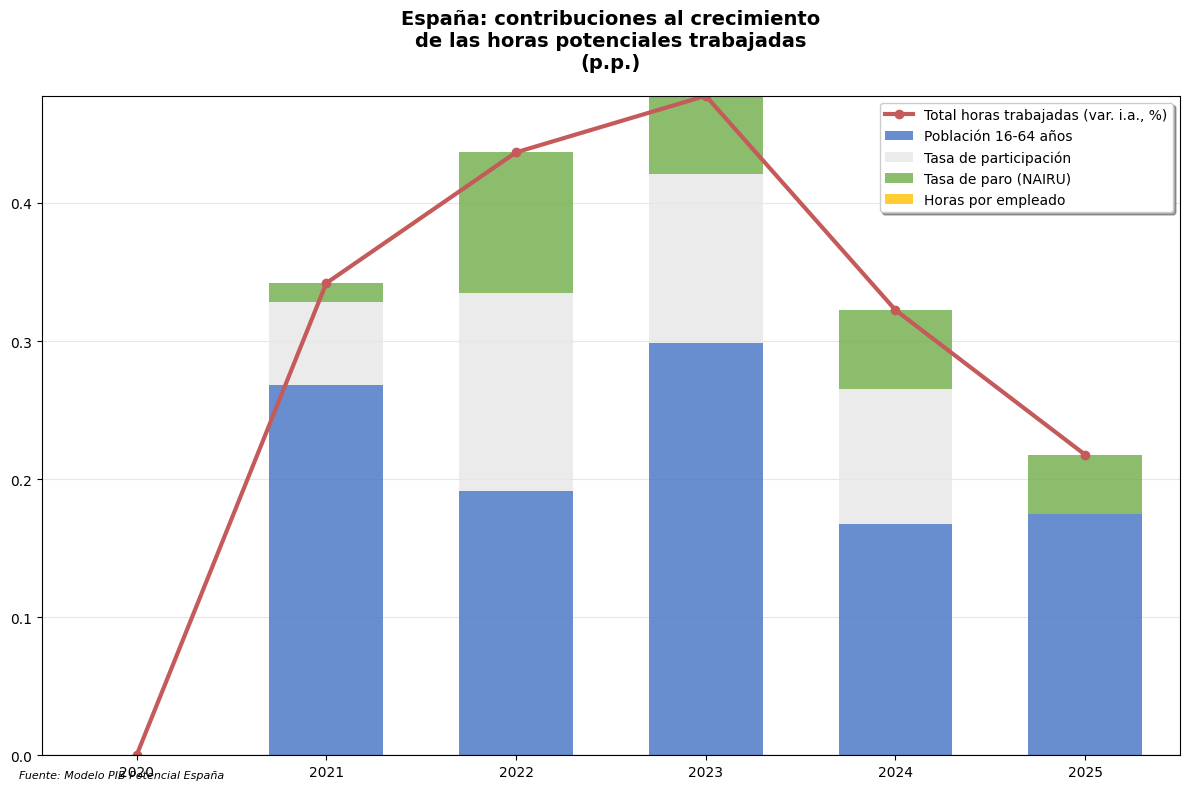


📊 Contribuciones por año (puntos porcentuales):
Año    Población  Participación Desempleo  Horas    Total   
------------------------------------------------------------
2020   0.00       0.00          0.00       0.00     0.00    
2021   0.27       0.06          0.01       0.00     0.34    
2022   0.19       0.14          0.10       0.00     0.44    
2023   0.30       0.12          0.06       0.00     0.48    
2024   0.17       0.10          0.06       0.00     0.32    
2025   0.17       0.00          0.04       0.00     0.22    


In [23]:
def plot_spain_growth_contributions(nairu_results, production_results, start_year=2020, end_year=2025):
    """
    Crear gráfico similar al de CaixaBank Research para España 2020-2025
    """
    
    print(f"📊 Generando gráfico contribuciones crecimiento España {start_year}-{end_year}...")
    
    # Extraer datos necesarios
    dates = nairu_results['dates']
    
    # Filtrar período de interés
    mask = (dates.year >= start_year) & (dates.year <= end_year)
    dates_period = dates[mask]
    
    if len(dates_period) == 0:
        print("❌ No hay datos para el período especificado")
        return
    
    # 1. Población 16-64 años (usar working_age_population como proxy)
    population_1664 = nairu_results['working_age_population'].iloc[mask]
    
    # 2. Tasa de participación
    participation_rate = nairu_results['participation_trend'].iloc[mask]
    
    # 3. Tasa de paro (NAIRU)
    unemployment_rate = nairu_results['nairu'].iloc[mask]
    
    # 4. Horas por empleado (calcular desde datos de empleo)
    employment_persons = nairu_results['employment_observed'].iloc[mask] / 1000  # Convertir a millones
    total_hours = production_results['data_used']['hours_worked'].iloc[mask] / 1000
    hours_per_employee = total_hours / employment_persons
    
    # Calcular contribuciones anuales (tasa de crecimiento)
    def calculate_annual_contributions(series, dates_period):
        """Calcular contribuciones anuales por año"""
        contributions = {}
        
        for year in range(start_year, end_year + 1):
            # Buscar datos del año
            year_mask = dates_period.year == year
            
            if not year_mask.any():
                contributions[year] = 0
                continue
            
            # Usar primer valor del año vs año anterior
            if year == start_year:
                # Para el primer año, usar crecimiento vs año anterior si está disponible
                prev_year_mask = dates_period.year == (year - 1)
                if prev_year_mask.any():
                    current_val = series[year_mask].iloc[0]
                    prev_val = series[prev_year_mask].iloc[-1]
                    growth = (current_val / prev_val - 1) * 100
                else:
                    growth = 0
            else:
                # Crecimiento vs año anterior
                current_year_mask = dates_period.year == year
                prev_year_mask = dates_period.year == (year - 1)
                
                if current_year_mask.any() and prev_year_mask.any():
                    current_val = series[current_year_mask].iloc[0]
                    prev_val = series[prev_year_mask].iloc[-1]
                    growth = (current_val / prev_val - 1) * 100
                else:
                    growth = 0
            
            contributions[year] = growth
        
        return contributions
    
    # Calcular contribuciones
    pop_contrib = calculate_annual_contributions(population_1664, dates_period)
    part_contrib = calculate_annual_contributions(participation_rate, dates_period)
    hours_contrib = calculate_annual_contributions(hours_per_employee, dates_period)
    
    # Para desempleo: reducción del desempleo = contribución positiva
    unemp_contrib = {}
    for year in range(start_year, end_year + 1):
        year_mask = dates_period.year == year
        if not year_mask.any():
            unemp_contrib[year] = 0
            continue
            
        if year == start_year:
            prev_year_mask = dates_period.year == (year - 1)
            if prev_year_mask.any():
                current_val = unemployment_rate[year_mask].iloc[0]
                prev_val = unemployment_rate[prev_year_mask].iloc[-1]
                # Invertir signo: reducción desempleo = contribución positiva
                unemp_contrib[year] = -(current_val - prev_val)
            else:
                unemp_contrib[year] = 0
        else:
            current_year_mask = dates_period.year == year
            prev_year_mask = dates_period.year == (year - 1)
            
            if current_year_mask.any() and prev_year_mask.any():
                current_val = unemployment_rate[current_year_mask].iloc[0]
                prev_val = unemployment_rate[prev_year_mask].iloc[-1]
                unemp_contrib[year] = -(current_val - prev_val)
            else:
                unemp_contrib[year] = 0
    
    # Crear gráfico
    years = list(range(start_year, end_year + 1))
    
    # Datos para barras apiladas
    pop_values = [pop_contrib[year] for year in years]
    part_values = [part_contrib[year] for year in years]
    unemp_values = [unemp_contrib[year] for year in years]
    hours_values = [hours_contrib[year] for year in years]
    
    # Calcular total de horas trabajadas (suma de componentes)
    total_hours_growth = [pop_values[i] + part_values[i] + unemp_values[i] + hours_values[i] 
                         for i in range(len(years))]
    
    # Configurar gráfico
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Colores similares al gráfico original
    colors = {
        'population': '#4472C4',      # Azul
        'participation': '#E7E6E6',   # Gris claro
        'unemployment': '#70AD47',    # Verde
        'hours': '#FFC000',          # Naranja
        'total': '#C55A5A'           # Rojo/naranja para línea
    }
    
    # Crear barras apiladas
    bar_width = 0.6
    
    ax.bar(years, pop_values, bar_width, label='Población 16-64 años', 
           color=colors['population'], alpha=0.8)
    
    ax.bar(years, part_values, bar_width, bottom=pop_values,
           label='Tasa de participación', color=colors['participation'], alpha=0.8)
    
    # Para las barras de desempleo, calcular bottom correcto
    bottom_unemp = [pop_values[i] + part_values[i] for i in range(len(years))]
    ax.bar(years, unemp_values, bar_width, bottom=bottom_unemp,
           label='Tasa de paro (NAIRU)', color=colors['unemployment'], alpha=0.8)
    
    # Para horas por empleado
    bottom_hours = [bottom_unemp[i] + unemp_values[i] for i in range(len(years))]
    ax.bar(years, hours_values, bar_width, bottom=bottom_hours,
           label='Horas por empleado', color=colors['hours'], alpha=0.8)
    
    # Línea de total
    ax.plot(years, total_hours_growth, color=colors['total'], 
            linewidth=3, marker='o', markersize=6, 
            label='Total horas trabajadas (var. i.a., %)')
    
    # Configuración del gráfico
    ax.set_title('España: contribuciones al crecimiento\nde las horas potenciales trabajadas\n(p.p.)', 
                fontsize=14, fontweight='bold', pad=20)
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Configurar ejes
    ax.set_xlim(start_year - 0.5, end_year + 0.5)
    ax.set_xticks(years)
    ax.set_xticklabels(years)
    
    # Grid horizontal
    ax.grid(True, axis='y', alpha=0.3, linestyle='-')
    ax.set_axisbelow(True)
    
    # Línea en y=0
    ax.axhline(y=0, color='black', linewidth=0.8)
    
    # Leyenda
    ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
    
    # Ajustar layout
    plt.tight_layout()
    
    # Nota al pie (opcional)
    fig.text(0.02, 0.02, 'Fuente: Modelo PIB Potencial España', fontsize=8, style='italic')
    
    plt.show()
    
    # Mostrar datos en tabla
    print(f"\n📊 Contribuciones por año (puntos porcentuales):")
    print(f"{'Año':<6} {'Población':<10} {'Participación':<13} {'Desempleo':<10} {'Horas':<8} {'Total':<8}")
    print("-" * 60)
    
    for i, year in enumerate(years):
        print(f"{year:<6} {pop_values[i]:<10.2f} {part_values[i]:<13.2f} {unemp_values[i]:<10.2f} "
              f"{hours_values[i]:<8.2f} {total_hours_growth[i]:<8.2f}")

# Ejecutar función
if __name__ == "__main__":
    # Usando tus resultados del NAIRU
    plot_spain_growth_contributions(nairu_results, production_results, 2020, 2025)

# Parte 5. Cálculo final de la potencial


🎯 PARTE 5: PIB POTENCIAL FINAL
   Combinando función producción + TFP + NAIRU
📊 Componentes alineados:
   • Período común: 2000-01 - 2025-01
   • Observaciones: 101
   • Elasticidad capital (α): 0.393
   • Series finales alineadas: 101 observaciones

🔧 Calculando PIB potencial final...
   🔧 Escalando TFP para consistencia:
     • TFP observada base: 2.92
     • Factor escala TFP: 0.03
   📊 Verificación escalas:
     • PIB real inicial: 207355M€
     • PIB potencial inicial: 207355M€
     • PIB real final: 317218M€
     • PIB potencial final: 367581M€
   ✅ PIB potencial calculado:
     • Crecimiento potencial promedio: 2.29% anual
     • Brecha actual: -13.70%
     • Volatilidad brecha: 4.30pp
     • PIB potencial actual: 367581M€
     • PIB real actual: 317218M€

🔮 PROYECTANDO PIB POTENCIAL 8 TRIMESTRES...
   📈 Tasas de crecimiento proyectadas (corregidas):
     • TFP tendencial: 1.24% anual (máx 1.5%)
     • Capital stock: 2.16% anual (1-3%)
     • Empleo potencial: 0.50% anual (demo

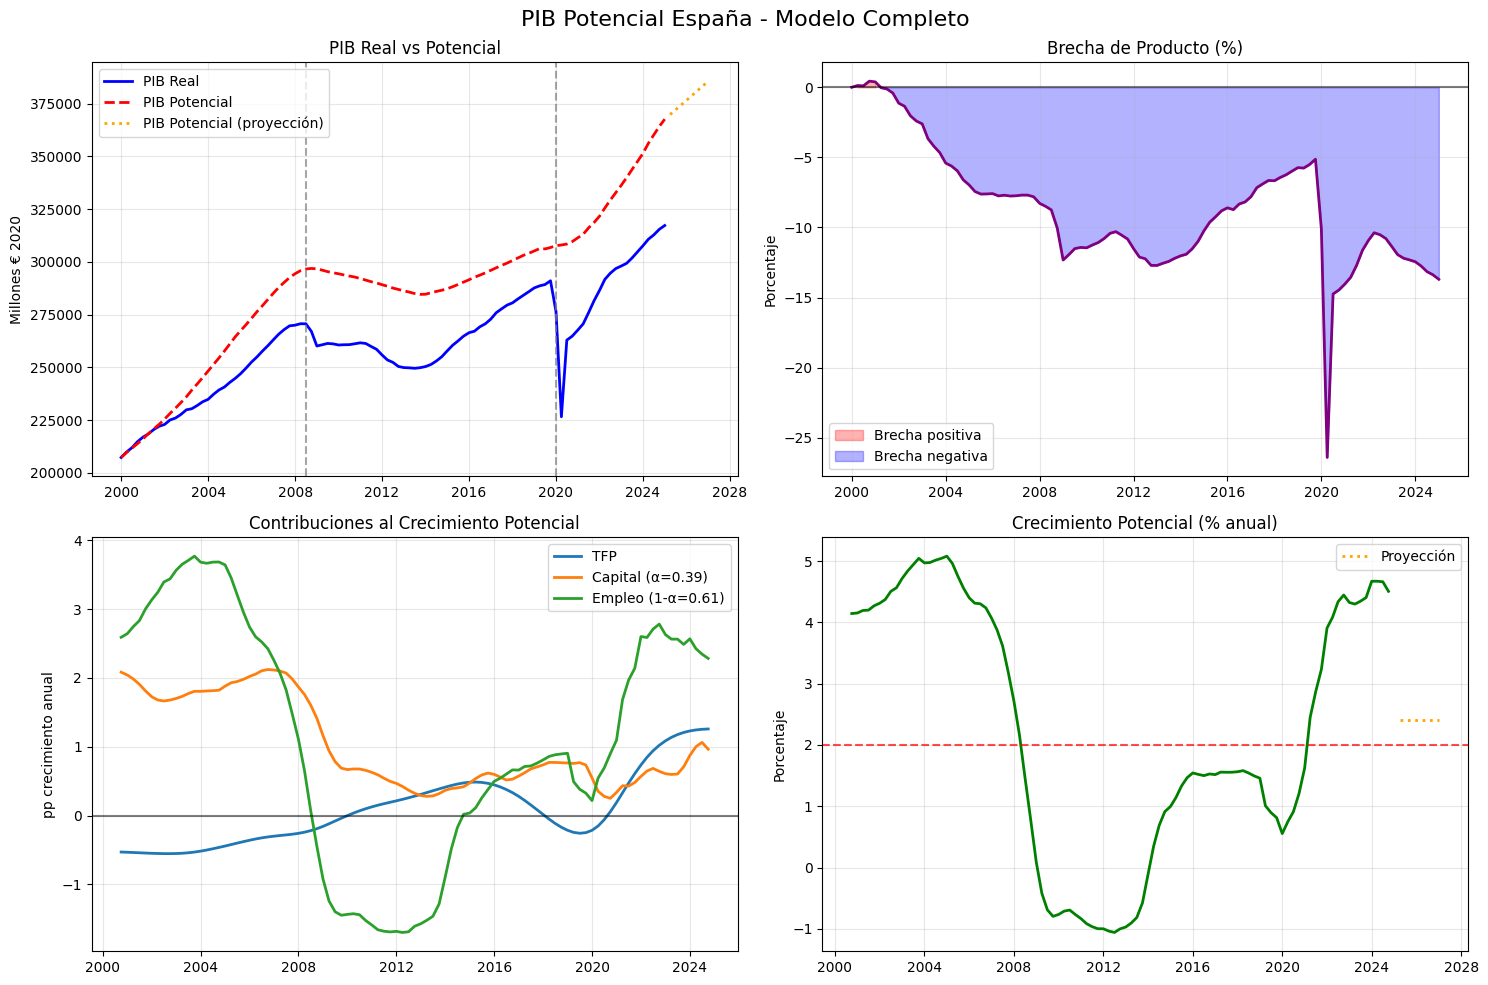


📁 Exportando resultados para modelo DSGE...
   ✅ Series exportadas a: pib_potencial_espana.csv
   📊 Total observaciones: 109
     • Históricas: 101
     • Proyecciones: 8

📋 REPORTE EJECUTIVO - PIB POTENCIAL ESPAÑA

🎯 SITUACIÓN ACTUAL:
   • Brecha de producto: -13.70%
   • PIB potencial: 367581M€
   • NAIRU: 12.1%

📈 CRECIMIENTO POTENCIAL:
   • Promedio histórico: 2.29% anual
   • Contribución TFP: 0.09% anual
   • Elasticidad capital: 0.393
   • Proyección 2025-2027: 2.40% anual

🔧 METODOLOGÍA:
   • Función de producción: Intensivo (OLS)
   • Descomposición TFP: Hodrick-Prescott
   • NAIRU: Curva de Phillips + HP suave

✅ MODELO COMPLETADO EXITOSAMENTE
   Listo para integración con modelo DSGE semi-estructural


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_final_potential_gdp(production_results, tfp_decomposition, nairu_results):
    """
    PARTE 5: Calcular PIB potencial final combinando todos los componentes
    
    Y* = A*_trend × K^α × L*^(1-α)
    
    Donde:
    - A*_trend: TFP tendencial (de PARTE 3)
    - K: Capital stock observado
    - L*: Empleo potencial (de PARTE 4)
    - α: Elasticidad capital (de PARTE 2)
    """
    
    print("\n" + "="*60)
    print("🎯 PARTE 5: PIB POTENCIAL FINAL")
    print("   Combinando función producción + TFP + NAIRU")
    print("="*60)
    
    # Extraer componentes de cada parte
    alpha = production_results['alpha']
    tfp_trend = tfp_decomposition['tfp_trend']
    tfp_cycle = tfp_decomposition['tfp_cycle']
    
    # Alinear todas las series al período común
    common_dates = nairu_results['dates']
    
    # Capital stock (del período común)
    capital_data = production_results['data_used']
    capital_common = capital_data[capital_data.index.isin(common_dates)]['capital_stock']
    
    # PIB real observado (del período común)
    gdp_real_common = capital_data[capital_data.index.isin(common_dates)]['gdp_real']
    
    # Empleo potencial (ya está en período común)
    employment_potential = nairu_results['employment_potential']
    
    # TFP tendencial (alinear al período común)
    tfp_trend_common = tfp_trend[tfp_trend.index.isin(common_dates)]
    tfp_cycle_common = tfp_cycle[tfp_cycle.index.isin(common_dates)]
    
    print(f"📊 Componentes alineados:")
    print(f"   • Período común: {common_dates[0].strftime('%Y-%m')} - {common_dates[-1].strftime('%Y-%m')}")
    print(f"   • Observaciones: {len(common_dates)}")
    print(f"   • Elasticidad capital (α): {alpha:.3f}")
    
    # Verificar alineación
    min_length = min(
        len(common_dates), len(capital_common), 
        len(employment_potential), len(tfp_trend_common)
    )
    
    # Truncar todas las series
    dates_final = common_dates[:min_length]
    capital_final = capital_common.iloc[:min_length]
    employment_potential_final = employment_potential.iloc[:min_length]
    tfp_trend_final = tfp_trend_common.iloc[:min_length]
    tfp_cycle_final = tfp_cycle_common.iloc[:min_length]
    gdp_real_final = gdp_real_common.iloc[:min_length]
    
    print(f"   • Series finales alineadas: {min_length} observaciones")
    
    # CALCULAR PIB POTENCIAL
    print(f"\n🔧 Calculando PIB potencial final...")
    
    # CORRECCIÓN: Normalizar TFP para consistencia con datos observados
    # Usar TFP implícita del PIB real observado como base
    tfp_observed_base = (gdp_real_final.iloc[0] / 
                        (capital_final.iloc[0]**alpha * 
                         employment_potential_final.iloc[0]**(1-alpha)))
    
    # Escalar TFP tendencial para que sea consistente
    tfp_scale_factor = tfp_observed_base / tfp_trend_final.iloc[0]
    tfp_trend_scaled = tfp_trend_final * tfp_scale_factor
    
    print(f"   🔧 Escalando TFP para consistencia:")
    print(f"     • TFP observada base: {tfp_observed_base:.2f}")
    print(f"     • Factor escala TFP: {tfp_scale_factor:.2f}")
    
    # PIB potencial = TFP_tendencial_escalada × K^α × L*^(1-α)
    gdp_potential_final = (tfp_trend_scaled * 
                          (capital_final**alpha) * 
                          (employment_potential_final**(1-alpha)))
    
    # Verificación de coherencia
    print(f"   📊 Verificación escalas:")
    print(f"     • PIB real inicial: {gdp_real_final.iloc[0]:.0f}M€")
    print(f"     • PIB potencial inicial: {gdp_potential_final.iloc[0]:.0f}M€")
    print(f"     • PIB real final: {gdp_real_final.iloc[-1]:.0f}M€")
    print(f"     • PIB potencial final: {gdp_potential_final.iloc[-1]:.0f}M€")
    
    # Brecha de producto final
    output_gap_final = (gdp_real_final / gdp_potential_final - 1) * 100
    
    # Crecimiento potencial
    potential_growth = np.diff(np.log(gdp_potential_final)) * 100  # Trimestral
    potential_growth_annual = np.mean(potential_growth) * 4  # Anualizado
    
    # Estadísticas
    gap_volatility = np.std(output_gap_final)
    gap_current = output_gap_final.iloc[-1]
    
    print(f"   ✅ PIB potencial calculado:")
    print(f"     • Crecimiento potencial promedio: {potential_growth_annual:.2f}% anual")
    print(f"     • Brecha actual: {gap_current:.2f}%")
    print(f"     • Volatilidad brecha: {gap_volatility:.2f}pp")
    print(f"     • PIB potencial actual: {gdp_potential_final.iloc[-1]:.0f}M€")
    print(f"     • PIB real actual: {gdp_real_final.iloc[-1]:.0f}M€")
    
    # Combinar resultados
    final_results = {
        'dates': dates_final,
        'gdp_real': gdp_real_final,
        'gdp_potential': gdp_potential_final,
        'output_gap': output_gap_final,
        'potential_growth': pd.Series(np.concatenate([[np.nan], potential_growth]), index=dates_final),
        'tfp_trend': tfp_trend_scaled,
        'tfp_cycle': tfp_cycle_final,
        'capital_stock': capital_final,
        'employment_potential': employment_potential_final,
        'nairu': nairu_results['nairu'].iloc[:min_length],
        'alpha': alpha,
        'methodology': {
            'production_function': production_results['method_used'],
            'tfp_decomposition': tfp_decomposition['method_used'],
            'nairu_method': nairu_results['nairu_method']
        }
    }
    
    return final_results

def forecast_potential_gdp(final_results, periods=8):
    """
    Proyectar PIB potencial hacia adelante
    """
    
    print(f"\n🔮 PROYECTANDO PIB POTENCIAL {periods} TRIMESTRES...")
    
    # Últimos valores observados
    last_date = final_results['dates'][-1]
    last_tfp_trend = final_results['tfp_trend'].iloc[-1]
    last_capital = final_results['capital_stock'].iloc[-1]
    last_employment_pot = final_results['employment_potential'].iloc[-1]
    last_gdp_potential = final_results['gdp_potential'].iloc[-1]
    
    alpha = final_results['alpha']
    
    # Tasas de crecimiento recientes (últimos 2 años)
    recent_periods = 8
    
    # TFP tendencial: usar crecimiento promedio reciente pero con límites realistas
    tfp_growth_recent = np.mean(
        np.diff(np.log(final_results['tfp_trend'].iloc[-recent_periods:]))
    ) * 4  # Anualizado
    # CORRECCIÓN: Limitar TFP a rango realista para España (0-1.5% anual)
    tfp_growth_projection = np.clip(tfp_growth_recent, 0.002, 0.015)  # 0.2%-1.5% anual
    
    # Capital: usar tendencia histórica pero más conservadora
    capital_growth_recent = np.mean(
        np.diff(np.log(final_results['capital_stock'].iloc[-recent_periods:]))
    ) * 4  # Anualizado
    # CORRECCIÓN: Capital más realista para España (1-3% anual)
    capital_growth_projection = np.clip(capital_growth_recent, 0.010, 0.030)  # 1-3% anual
    
    # Empleo potencial: demografía española (baja o negativa)
    employment_growth_recent = np.mean(
        np.diff(np.log(final_results['employment_potential'].iloc[-recent_periods:]))
    ) * 4  # Anualizado
    # CORRECCIÓN: Demografía española realista (-0.5% a +0.5% anual)
    employment_growth_projection = np.clip(employment_growth_recent, -0.005, 0.005)  # -0.5% a +0.5%
    
    print(f"   📈 Tasas de crecimiento proyectadas (corregidas):")
    print(f"     • TFP tendencial: {tfp_growth_projection*100:.2f}% anual (máx 1.5%)")
    print(f"     • Capital stock: {capital_growth_projection*100:.2f}% anual (1-3%)")
    print(f"     • Empleo potencial: {employment_growth_projection*100:.2f}% anual (demografía)")
    
    # Verificar crecimiento potencial implícito
    implied_gdp_growth = (tfp_growth_projection + 
                         alpha * capital_growth_projection + 
                         (1-alpha) * employment_growth_projection)
    print(f"     • PIB potencial implícito: {implied_gdp_growth*100:.2f}% anual")
    
    # Proyecciones
    forecast_data = []
    
    for t in range(1, periods + 1):
        # Fechas futuras
        future_date = last_date + pd.DateOffset(months=3*t)
        
        # Componentes proyectados (crecimiento trimestral)
        tfp_proj = last_tfp_trend * (1 + tfp_growth_projection/4) ** t
        capital_proj = last_capital * (1 + capital_growth_projection/4) ** t
        employment_proj = last_employment_pot * (1 + employment_growth_projection/4) ** t
        
        # PIB potencial proyectado
        gdp_pot_proj = tfp_proj * (capital_proj**alpha) * (employment_proj**(1-alpha))
        
        # Crecimiento vs período anterior
        if t == 1:
            base_gdp = last_gdp_potential
        else:
            base_gdp = forecast_data[t-2]['gdp_potential']
            
        growth_rate = (gdp_pot_proj / base_gdp - 1) * 100
        
        forecast_data.append({
            'date': future_date,
            'period': f'T+{t}',
            'gdp_potential': gdp_pot_proj,
            'potential_growth': growth_rate,
            'tfp_trend': tfp_proj,
            'capital_stock': capital_proj,
            'employment_potential': employment_proj
        })
    
    # Crear DataFrame de proyección
    forecast_df = pd.DataFrame(forecast_data)
    
    # Crecimiento promedio proyectado
    avg_growth_forecast = np.mean(forecast_df['potential_growth']) * 4  # Anualizado
    
    print(f"\n   📊 Proyecciones PIB potencial:")
    print(f"     • Crecimiento promedio proyectado: {avg_growth_forecast:.2f}% anual")
    
    for _, row in forecast_df.iterrows():
        quarter = (row['date'].month - 1) // 3 + 1
        quarter_str = f"{row['date'].year}Q{quarter}"
        print(f"     {row['period']} ({quarter_str}): {row['potential_growth']:.2f}%")
    
    return forecast_df

def plot_final_results(final_results, forecast_df=None):
    """
    Gráficos finales del PIB potencial
    """
    
    print(f"\n📊 Generando gráficos finales...")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('PIB Potencial España - Modelo Completo', fontsize=16)
    
    dates = final_results['dates']
    
    # 1. PIB Real vs Potencial
    ax1 = axes[0, 0]
    ax1.plot(dates, final_results['gdp_real'], label='PIB Real', linewidth=2, color='blue')
    ax1.plot(dates, final_results['gdp_potential'], label='PIB Potencial', 
             linewidth=2, linestyle='--', color='red')
    
    # Añadir proyecciones si están disponibles
    if forecast_df is not None:
        ax1.plot(forecast_df['date'], forecast_df['gdp_potential'], 
                label='PIB Potencial (proyección)', linewidth=2, linestyle=':', color='orange')
    
    ax1.set_title('PIB Real vs Potencial')
    ax1.set_ylabel('Millones € 2020')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Marcar crisis
    crisis_dates = [pd.to_datetime('2008-07-01'), pd.to_datetime('2020-01-01')]
    for crisis_date in crisis_dates:
        if crisis_date >= dates[0] and crisis_date <= dates[-1]:
            ax1.axvline(crisis_date, color='gray', linestyle='--', alpha=0.7)
    
    # 2. Brecha de Producto
    ax2 = axes[0, 1]
    output_gap = final_results['output_gap']
    ax2.plot(dates, output_gap, linewidth=2, color='purple')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax2.fill_between(dates, output_gap, 0, 
                    where=(output_gap > 0), alpha=0.3, color='red', 
                    label='Brecha positiva')
    ax2.fill_between(dates, output_gap, 0, 
                    where=(output_gap < 0), alpha=0.3, color='blue',
                    label='Brecha negativa')
    ax2.set_title('Brecha de Producto (%)')
    ax2.set_ylabel('Porcentaje')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Componentes del Crecimiento
    ax3 = axes[1, 0]
    
    # Calcular contribuciones aproximadas
    alpha = final_results['alpha']
    log_tfp = np.log(final_results['tfp_trend'])
    log_capital = np.log(final_results['capital_stock'])
    log_employment = np.log(final_results['employment_potential'])
    
    contrib_tfp = np.diff(log_tfp) * 100 * 4  # Anualizado
    contrib_capital = alpha * np.diff(log_capital) * 100 * 4
    contrib_employment = (1-alpha) * np.diff(log_employment) * 100 * 4
    
    # Suavizar con media móvil
    window = 4
    dates_growth = dates[1:]
    contrib_tfp_smooth = pd.Series(contrib_tfp).rolling(window, center=True).mean()
    contrib_capital_smooth = pd.Series(contrib_capital).rolling(window, center=True).mean()
    contrib_employment_smooth = pd.Series(contrib_employment).rolling(window, center=True).mean()
    
    ax3.plot(dates_growth, contrib_tfp_smooth, label='TFP', linewidth=2)
    ax3.plot(dates_growth, contrib_capital_smooth, label=f'Capital (α={alpha:.2f})', linewidth=2)
    ax3.plot(dates_growth, contrib_employment_smooth, label=f'Empleo (1-α={1-alpha:.2f})', linewidth=2)
    
    ax3.set_title('Contribuciones al Crecimiento Potencial')
    ax3.set_ylabel('pp crecimiento anual')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # 4. Crecimiento Potencial en el Tiempo
    ax4 = axes[1, 1]
    potential_growth = final_results['potential_growth'] * 4  # Anualizar
    potential_growth_smooth = potential_growth.rolling(window=4, center=True).mean()
    
    ax4.plot(dates, potential_growth_smooth, linewidth=2, color='green')
    
    # Añadir proyecciones
    if forecast_df is not None:
        forecast_growth_annual = forecast_df['potential_growth'] * 4
        ax4.plot(forecast_df['date'], forecast_growth_annual, 
                linewidth=2, linestyle=':', color='orange', label='Proyección')
        ax4.legend()
    
    ax4.set_title('Crecimiento Potencial (% anual)')
    ax4.set_ylabel('Porcentaje')
    ax4.grid(True, alpha=0.3)
    ax4.axhline(y=2, color='red', linestyle='--', alpha=0.7, label='2% referencia')
    
    plt.tight_layout()
    plt.show()

def export_results_for_dsge(final_results, forecast_df=None, output_file="pib_potencial_espana.csv"):
    """
    Exportar resultados para integración con modelo DSGE
    """
    
    print(f"\n📁 Exportando resultados para modelo DSGE...")
    
    # Crear DataFrame con series principales
    export_data = pd.DataFrame({
        'date': final_results['dates'],
        'gdp_real': final_results['gdp_real'],
        'gdp_potential': final_results['gdp_potential'],
        'output_gap': final_results['output_gap'],
        'potential_growth': final_results['potential_growth'],
        'tfp_trend': final_results['tfp_trend'],
        'tfp_cycle': final_results['tfp_cycle'],
        'nairu': final_results['nairu'],
        'employment_potential': final_results['employment_potential']
    })
    
    # Añadir proyecciones si están disponibles
    if forecast_df is not None:
        forecast_export = pd.DataFrame({
            'date': forecast_df['date'],
            'gdp_real': np.nan,  # No proyectamos PIB real
            'gdp_potential': forecast_df['gdp_potential'],
            'output_gap': np.nan,  # Se calculará en DSGE
            'potential_growth': forecast_df['potential_growth'],
            'tfp_trend': forecast_df['tfp_trend'],
            'tfp_cycle': 0,  # Ciclo TFP converge a 0
            'nairu': final_results['nairu'].iloc[-1],  # NAIRU constante en proyección
            'employment_potential': forecast_df['employment_potential']
        })
        
        export_data = pd.concat([export_data, forecast_export], ignore_index=True)
    
    # Guardar
    export_data.to_csv(output_file, index=False)
    
    print(f"   ✅ Series exportadas a: {output_file}")
    print(f"   📊 Total observaciones: {len(export_data)}")
    
    if forecast_df is not None:
        print(f"     • Históricas: {len(final_results['dates'])}")
        print(f"     • Proyecciones: {len(forecast_df)}")
    
    return export_data

def generate_summary_report(final_results, forecast_df=None):
    """
    Generar reporte resumen ejecutivo
    """
    
    print(f"\n" + "="*60)
    print("📋 REPORTE EJECUTIVO - PIB POTENCIAL ESPAÑA")
    print("="*60)
    
    # Estadísticas clave
    output_gap_current = final_results['output_gap'].iloc[-1]
    potential_growth_avg = np.nanmean(final_results['potential_growth']) * 4
    tfp_growth_avg = np.nanmean(np.diff(np.log(final_results['tfp_trend']))) * 400
    
    print(f"\n🎯 SITUACIÓN ACTUAL:")
    print(f"   • Brecha de producto: {output_gap_current:.2f}%")
    print(f"   • PIB potencial: {final_results['gdp_potential'].iloc[-1]:.0f}M€")
    print(f"   • NAIRU: {final_results['nairu'].iloc[-1]:.1f}%")
    
    print(f"\n📈 CRECIMIENTO POTENCIAL:")
    print(f"   • Promedio histórico: {potential_growth_avg:.2f}% anual")
    print(f"   • Contribución TFP: {tfp_growth_avg:.2f}% anual")
    print(f"   • Elasticidad capital: {final_results['alpha']:.3f}")
    
    if forecast_df is not None:
        forecast_growth_avg = np.mean(forecast_df['potential_growth']) * 4
        print(f"   • Proyección 2025-2027: {forecast_growth_avg:.2f}% anual")
    
    print(f"\n🔧 METODOLOGÍA:")
    print(f"   • Función de producción: {final_results['methodology']['production_function']}")
    print(f"   • Descomposición TFP: {final_results['methodology']['tfp_decomposition']}")
    print(f"   • NAIRU: {final_results['methodology']['nairu_method']}")
    
    print(f"\n✅ MODELO COMPLETADO EXITOSAMENTE")
    print("   Listo para integración con modelo DSGE semi-estructural")
    print("="*60)

# EJECUTAR PARTE 5 COMPLETA
def run_complete_potential_gdp_model(production_results, tfp_decomposition, nairu_results):
    """
    Ejecutar modelo completo de PIB potencial
    """
    
    # 1. Calcular PIB potencial final
    final_results = calculate_final_potential_gdp(production_results, tfp_decomposition, nairu_results)
    
    # 2. Proyectar hacia adelante
    forecast_df = forecast_potential_gdp(final_results, periods=8)
    
    # 3. Generar gráficos
    plot_final_results(final_results, forecast_df)
    
    # 4. Exportar para DSGE
    export_data = export_results_for_dsge(final_results, forecast_df)
    
    # 5. Reporte ejecutivo
    generate_summary_report(final_results, forecast_df)
    
    return {
        'final_results': final_results,
        'forecasts': forecast_df,
        'export_data': export_data
    }

# EJECUTAR
if __name__ == "__main__":
    # Para ejecutar modelo completo:
    complete_model = run_complete_potential_gdp_model(production_results, tfp_decomposition, nairu_results)